<a href="https://colab.research.google.com/github/Abkhenaten/Projects/blob/master/Marketing_Segmentation_Unsupervised_Learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Transactors: Customers who pay the least amount of interest charges and are careful with their money.
Revolvers: Customers who use their credit card as a loan. This group is the most lucrative for the company since they pay 20%+ interest.
New Customers: New Customers with low tenure who can be targeted to enroll in other services.
VIP/Prime: Customer with high credit limit and high % of full payment, targeted to increase credit limit/ spending.

In [ ]:
#Import libraries and Datasets
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib as plt
import matplotlib.pyplot as plt
import time
from sklearn.datasets import fetch_openml
from sklearn.preprocessing import StandardScaler, normalize
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

%matplotlib inline

In [ ]:
from google.colab import drive 
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
creditcard_df = pd.read_csv('/content/drive/My Drive/marketing_data.csv')

CUSTID: Identification of Credit Card holder

BALANCE: Balance amount left in customer's account to purchases.

BALANCE_FREQUENCY: How frequently the Balance is updated

PURCHASES: Amount of purchases made from account

ONEOFFPURCHASES: Maximum purchase amount done in one-go

INSTALLMENTS_PURCHASES: Amount of purchse done in installment

CASH_ADVANCE: Cash advanced to user

PURCHASES_FREQUENCY: How frequently purchases are being made

ONEOFF_PURCHASES_FREQUENCY: How frequently Purchases are happening in one-go

PURCHASES_INSTALLMENTS_FREQUENCY: How frequently purchases in installments are being made

CASH_ADVANCE_FREQUENCY: How frequently cash being paid

CASH_ADVANCE_TRX: Number of Transactions made with "Cash in Advance"

PURCHASES_TRX: Number of purchase transactions made

CREDIT_LIMIT: Limit of Credit Card for user

PAYMENTS: Amount of Payment done by user

MINIMUM_PAYMENTS: Minimum amount of payments made by user  

PRC_FULL_PAYMENT: Percent of full payment paid by user

TENURE: Tenure of credit card service for user


In [ ]:
creditcard_df.head()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


In [ ]:
creditcard_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           8950 non-null   object 
 1   BALANCE                           8950 non-null   float64
 2   BALANCE_FREQUENCY                 8950 non-null   float64
 3   PURCHASES                         8950 non-null   float64
 4   ONEOFF_PURCHASES                  8950 non-null   float64
 5   INSTALLMENTS_PURCHASES            8950 non-null   float64
 6   CASH_ADVANCE                      8950 non-null   float64
 7   PURCHASES_FREQUENCY               8950 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 11  CASH_ADVANCE_TRX                  8950 non-null   int64  
 12  PURCHA


Let's apply describe() and get more statistical insights on our dataframe

In [ ]:
creditcard_df.describe()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
count,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8949.000000,8950.000000,8637.000000,8950.000000,8950.000000
mean,1564.474828,0.877271,1003.204834,592.437371,411.067645,978.871112,0.490351,0.202458,0.364437,0.135144,3.248827,14.709832,4494.449450,1733.143852,864.206542,0.153715,11.517318
std,2081.531879,0.236904,2136.634782,1659.887917,904.338115,2097.163877,0.401371,0.298336,0.397448,0.200121,6.824647,24.857649,3638.815725,2895.063757,2372.446607,0.292499,1.338331
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,50.000000,0.000000,0.019163,0.000000,6.000000
25%,128.281915,0.888889,39.635000,0.000000,0.000000,0.000000,0.083333,0.000000,0.000000,0.000000,0.000000,1.000000,1600.000000,383.276166,169.123707,0.000000,12.000000
50%,873.385231,1.000000,361.280000,38.000000,89.000000,0.000000,0.500000,0.083333,0.166667,0.000000,0.000000,7.000000,3000.000000,856.901546,312.343947,0.000000,12.000000
75%,2054.140036,1.000000,1110.130000,577.405000,468.637500,1113.821139,0.916667,0.300000,0.750000,0.222222,4.000000,17.000000,6500.000000,1901.134317,825.485459,0.142857,12.000000
max,19043.138560,1.000000,49039.570000,40761.250000,22500.000000,47137.211760,1.000000,1.000000,1.000000,1.500000,123.000000,358.000000,30000.000000,50721.483360,76406.207520,1.000000,12.000000


Mean balance is $1564 

Balance frequency is frequently updated on average ~0.9

Purchases average is $1000

one off purchase average is ~$600

Average purchases frequency is around 0.5

average ONEOFF_PURCHASES_FREQUENCY, PURCHASES_INSTALLMENTS_FREQUENCY, and CASH_ADVANCE_FREQUENCY are generally low

Average credit limit ~ 4500

Percent of full payment is 15%

Average tenure is 11 years

In [ ]:
#Who made max "ONEOFF_Purchases"?
creditcard_df[creditcard_df['ONEOFF_PURCHASES'] == 40761.25]


,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
550,C10574,11547.52001,1.0,49039.57,40761.25,8278.32,558.166886,1.0,1.0,0.916667,0.083333,1,101,22500.0,46930.59824,2974.069421,0.25,12


In [ ]:
sns.heatmap(creditcard_df.isnull(), yticklabels = False, cbar = False, cmap = 'Blues')

<IPython.core.display.Javascript object>

In [ ]:
creditcard_df.isnull().sum()

CUST_ID                               0
BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          1
PAYMENTS                              0
MINIMUM_PAYMENTS                    313
PRC_FULL_PAYMENT                      0
TENURE                                0
dtype: int64

In [ ]:
#Fill missing values with the mean
creditcard_df.loc[(creditcard_df['MINIMUM_PAYMENTS'].isnull() == True), 'MINIMUM_PAYMENTS'] = creditcard_df['MINIMUM_PAYMENTS'].mean()
creditcard_df.loc[(creditcard_df['CREDIT_LIMIT'].isnull() == True), 'CREDIT_LIMIT'] = creditcard_df['CREDIT_LIMIT'].mean()

In [ ]:
#Verefy values have been filled
creditcard_df.isnull().sum()

CUST_ID                             0
BALANCE                             0
BALANCE_FREQUENCY                   0
PURCHASES                           0
ONEOFF_PURCHASES                    0
INSTALLMENTS_PURCHASES              0
CASH_ADVANCE                        0
PURCHASES_FREQUENCY                 0
ONEOFF_PURCHASES_FREQUENCY          0
PURCHASES_INSTALLMENTS_FREQUENCY    0
CASH_ADVANCE_FREQUENCY              0
CASH_ADVANCE_TRX                    0
PURCHASES_TRX                       0
CREDIT_LIMIT                        0
PAYMENTS                            0
MINIMUM_PAYMENTS                    0
PRC_FULL_PAYMENT                    0
TENURE                              0
dtype: int64

In [ ]:
#Check for Duplicates in data
creditcard_df.duplicated().sum()

0

In [ ]:
#Dropping 'CUST_ID' column
creditcard_df.drop('CUST_ID', axis = 1, inplace = True)
creditcard_df

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,40.900749,0.818182,95.40,0.00,95.40,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,3202.467416,0.909091,0.00,0.00,0.00,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,2495.148862,1.000000,773.17,773.17,0.00,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,1666.670542,0.636364,1499.00,1499.00,0.00,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,864.206542,0.000000,12
4,817.714335,1.000000,16.00,16.00,0.00,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8945,28.493517,1.000000,291.12,0.00,291.12,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,325.594462,48.886365,0.500000,6
8946,19.183215,1.000000,300.00,0.00,300.00,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,275.861322,864.206542,0.000000,6
8947,23.398673,0.833333,144.40,0.00,144.40,0.000000,0.833333,0.000000,0.666667,0.000000,0,5,1000.0,81.270775,82.418369,0.250000,6
8948,13.457564,0.833333,0.00,0.00,0.00,36.558778,0.000000,0.000000,0.000000,0.166667,2,0,500.0,52.549959,55.755628,0.250000,6


In [ ]:
#What are out columns
creditcard_df.columns


Index(['BALANCE', 'BALANCE_FREQUENCY', 'PURCHASES', 'ONEOFF_PURCHASES',
       'INSTALLMENTS_PURCHASES', 'CASH_ADVANCE', 'PURCHASES_FREQUENCY',
       'ONEOFF_PURCHASES_FREQUENCY', 'PURCHASES_INSTALLMENTS_FREQUENCY',
       'CASH_ADVANCE_FREQUENCY', 'CASH_ADVANCE_TRX', 'PURCHASES_TRX',
       'CREDIT_LIMIT', 'PAYMENTS', 'MINIMUM_PAYMENTS', 'PRC_FULL_PAYMENT',
       'TENURE'],
      dtype='object')


KDE Plot represents the Kernel Density Estimate

KDE is used for visualizing the Probability Density of a continuous variable. 

KDE demonstrates the probability density at different values in a continuous variable. 

Mean of balance is $1500

'Balance_Frequency' for most customers is updated frequently ~1

For 'PURCHASES_FREQUENCY', there are two distinct group of customers

For 'ONEOFF_PURCHASES_FREQUENCY' and 'PURCHASES_INSTALLMENT_FREQUENCY' most 
users don't do one off puchases or installment purchases frequently 

Very small number of customers pay their balance in full 'PRC_FULL_PAYMENT'~0

Credit limit average is around $4500

Most customers are ~11 years tenure

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

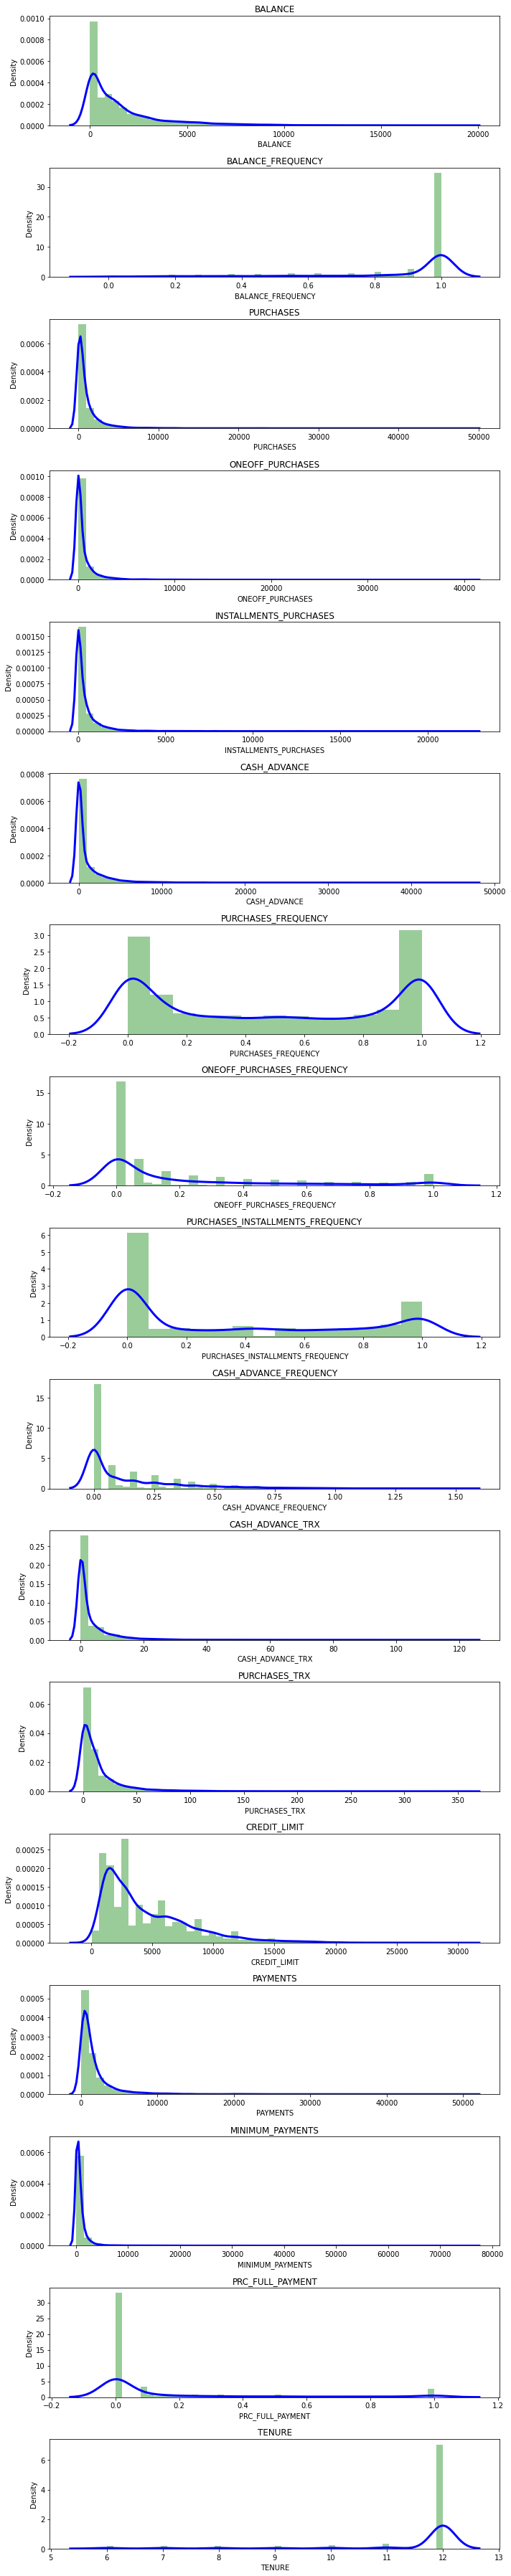

In [ ]:
plt.figure(figsize=(10,50))
for i in range(len(creditcard_df.columns)):
  plt.subplot(17,1,i+1)
  sns.distplot(creditcard_df[creditcard_df.columns[i]], kde_kws={"color":"b", "lw":3, "label":"KDE"}, hist_kws={"color":"g"})
  plt.title(creditcard_df.columns[i])

plt.tight_layout()

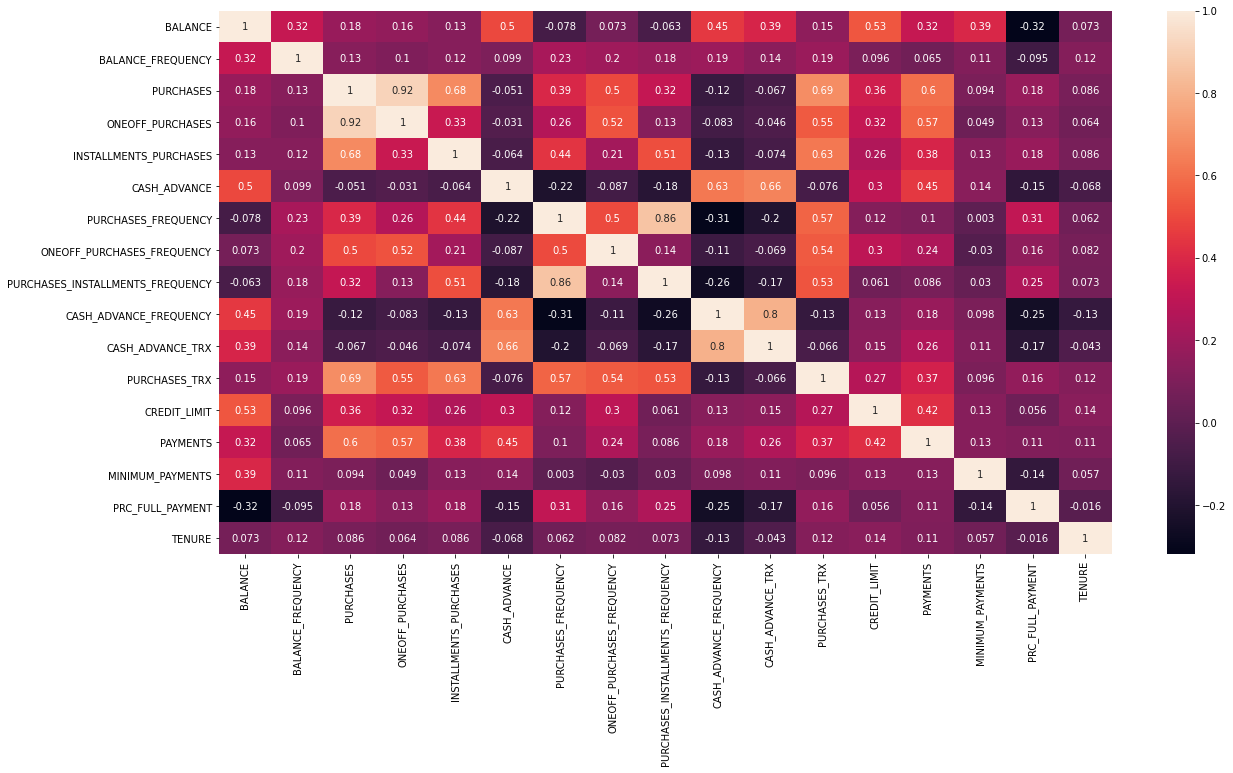

In [ ]:
correlations = creditcard_df.corr()
f, ax = plt.subplots(figsize=(20,10))
sns.heatmap(correlations, annot = True)

K-means

The algorithm groups observations with similar attribute values together by measuring the Euclidian distance between points.

K-means terminates after a fixed number of iterations is reached.

K-means terminates when the centroid locations do not change between iterations.

Find optimal number of clusters using Elbow method

The elbow methos is a heuristic method of interpretation and validation of consistency within cluster analysis designed to help find the appropriate number of clusters in a dataset.


In [ ]:
#Scale the data
scaler = StandardScaler()
creditcard_df_scaled = scaler.fit_transform(creditcard_df)

In [ ]:
creditcard_df_scaled.shape

(8950, 17)

In [ ]:
creditcard_df_scaled

array([[-0.73198937, -0.24943448, -0.42489974, ..., -0.31096755,
        -0.52555097,  0.36067954],
       [ 0.78696085,  0.13432467, -0.46955188, ...,  0.08931021,
         0.2342269 ,  0.36067954],
       [ 0.44713513,  0.51808382, -0.10766823, ..., -0.10166318,
        -0.52555097,  0.36067954],
       ...,
       [-0.7403981 , -0.18547673, -0.40196519, ..., -0.33546549,
         0.32919999, -4.12276757],
       [-0.74517423, -0.18547673, -0.46955188, ..., -0.34690648,
         0.32919999, -4.12276757],
       [-0.57257511, -0.88903307,  0.04214581, ..., -0.33294642,
        -0.52555097, -4.12276757]])

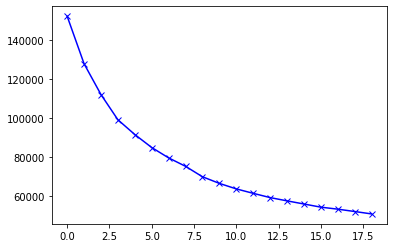

In [ ]:
scores_1 =[]
range_values = range(1,20)

for i in range_values:
  kmeans = KMeans(n_clusters = i)
  kmeans.fit(creditcard_df_scaled)
  scores_1.append(kmeans.inertia_)

plt.plot(scores_1, 'bx-')

If we use all features 7 or 8 would be the number of clusters.

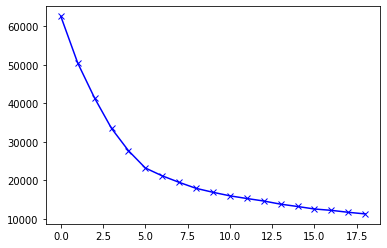

In [ ]:
#Checking for changes if we only use 8 features
scores_1 =[]
range_values = range(1,20)

for i in range_values:
  kmeans = KMeans(n_clusters = i)
  kmeans.fit(creditcard_df_scaled[:, :7])
  scores_1.append(kmeans.inertia_)

plt.plot(scores_1, 'bx-')

If we only use the first 7, the number of clusters would be 5.

In [ ]:
kmeans = KMeans(7)
kmeans.fit(creditcard_df_scaled)
labels = kmeans.labels_ 

In [ ]:
#Centroid for clusters
kmeans.cluster_centers_.shape

(7, 17)

In [ ]:
#Centroids for each feature
cluster_centers = pd.DataFrame(data = kmeans.cluster_centers_, columns= [creditcard_df.columns])
cluster_centers

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,-0.335506,-0.348076,-0.284525,-0.208973,-0.288475,0.065539,-0.198735,-0.272572,-0.230755,0.304112,-0.002216,-0.385586,-0.556898,-0.390701,-0.209383,0.012899,-3.193765
1,1.650309,0.397134,-0.203563,-0.149700,-0.206388,1.973882,-0.456072,-0.188372,-0.404666,1.904574,1.908806,-0.240292,0.998756,0.812395,0.542363,-0.394059,0.072963
2,-0.701329,-2.132409,-0.307190,-0.231071,-0.301714,-0.320269,-0.548149,-0.429684,-0.441113,-0.520666,-0.375795,-0.416379,-0.172499,-0.191899,-0.257180,0.298615,0.202573
3,1.502824,0.406491,7.310815,6.389959,5.543973,0.015522,1.072591,1.833619,1.037771,-0.319186,-0.117442,4.843666,2.228858,5.034193,1.184700,0.806631,0.331183
4,0.145765,0.430720,0.973857,0.924456,0.604267,-0.307665,1.101493,1.881096,0.549846,-0.407200,-0.316467,1.230209,0.722388,0.411960,-0.029410,0.471295,0.307135
5,-0.371345,0.331865,-0.039176,-0.231802,0.333057,-0.367709,0.982694,-0.346927,1.173827,-0.477056,-0.362503,0.174052,-0.275517,-0.222575,-0.029977,0.305251,0.252368
6,0.003442,0.403443,-0.341072,-0.221502,-0.399413,-0.111042,-0.804969,-0.329833,-0.752217,0.074210,-0.048226,-0.462333,-0.304335,-0.249341,-0.016436,-0.452209,0.272274


In [ ]:
# In order to understand what these numbers mean, let's perform inverse transformation
cluster_centers = scaler.inverse_transform(cluster_centers)
cluster_centers = pd.DataFrame(data = cluster_centers, columns = [creditcard_df.columns])
cluster_centers




,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,866.148306,0.794815,395.311749,245.585564,150.203132,1116.308792,0.410589,0.121144,0.272729,0.196000,3.233704,5.125596,2468.226470,602.104087,376.247870,0.157487,7.243243
1,4999.454652,0.971348,568.288361,343.966810,224.433399,5118.193206,0.307307,0.146263,0.203613,0.516269,16.275028,8.737074,8128.332833,4084.949005,2128.160852,0.038459,11.614961
2,104.718081,0.372123,346.889228,208.907313,138.231117,307.252169,0.270352,0.074275,0.189128,0.030954,0.684299,4.360202,3866.825730,1177.615452,264.859949,0.241055,11.788413
3,4692.477130,0.973565,16622.873947,11198.460658,5424.413289,1011.421719,0.920833,0.749462,0.776874,0.071272,2.447368,135.105263,12603.947368,16306.639412,3625.099437,0.389640,11.960526
4,1867.873391,0.979304,3083.865947,2126.845287,957.498368,333.684253,0.932433,0.763625,0.582960,0.053659,1.089172,45.288217,7122.792415,2925.728113,795.667678,0.291560,11.928344
5,791.551353,0.955886,919.503646,207.692997,712.246608,207.768349,0.884753,0.098963,0.830946,0.039680,0.775012,19.036115,3492.005955,1088.810945,794.345351,0.242995,11.855051
6,1571.638361,0.972843,274.498577,224.789813,49.883018,746.010722,0.167277,0.104062,0.065487,0.149994,2.919718,3.217958,3387.153756,1011.324867,825.902269,0.021451,11.881690


Index 2: First Customer cluster (Transactors): Those are customers who pay least amount of intrerest charges and careful with their money, Cluster with lowest balance ($104) and cash advance ($307), Percentage of full payment = 24%

Index 1: Second Customer cluster (revolvers) who use credit card as a loan (most lucrative sector): highest balance ($5000) and cash advance (~$5100), low purchase frequency, high cash advance frequency (0.5), high cash advance transactions (16) and low percentage of full payment (3%)
 
Index 3: Third Customer cluster(VIP/Prime): high credit limit $12.5K and highest percentage of full payment, target for increase credit limit and increase spending habits

Index 5: Fourth Customer cluster (low tenure): these are customers with low tenure (7 years), low balance 

In [ ]:
labels.shape

(8950,)

In [ ]:
labels.min()

0

In [ ]:
labels.max()

7

In [ ]:
y_kmeans = kmeans.fit_predict(creditcard_df_scaled)
y_kmeans

array([2, 0, 5, ..., 3, 3, 3], dtype=int32)

In [ ]:
#Concatenate clusters labels to original dataframe.
creditcard_df_cluster = pd.concat([creditcard_df,pd.DataFrame({'cluster':labels})], axis=1)
creditcard_df_cluster.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,cluster
0,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12,1
1,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12,3
2,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12,0
3,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,864.206542,0.000000,12,1
4,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12,1


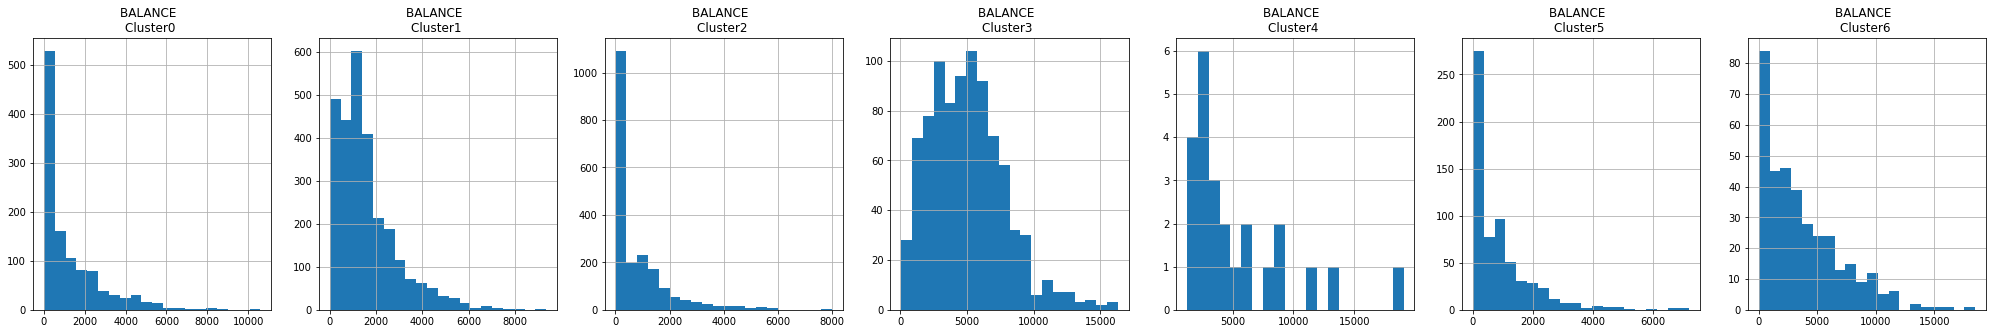

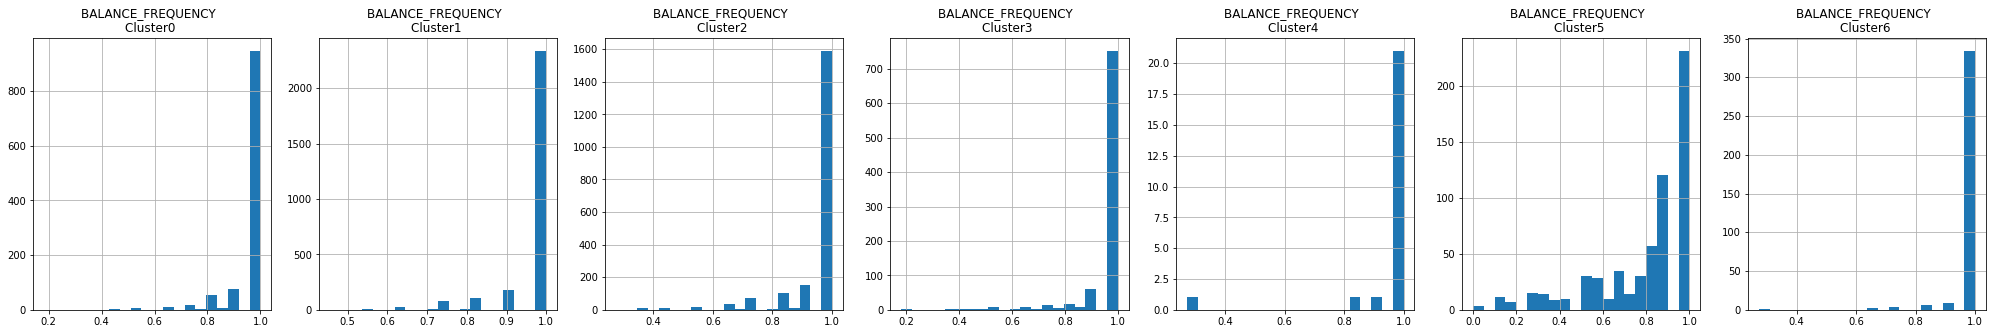

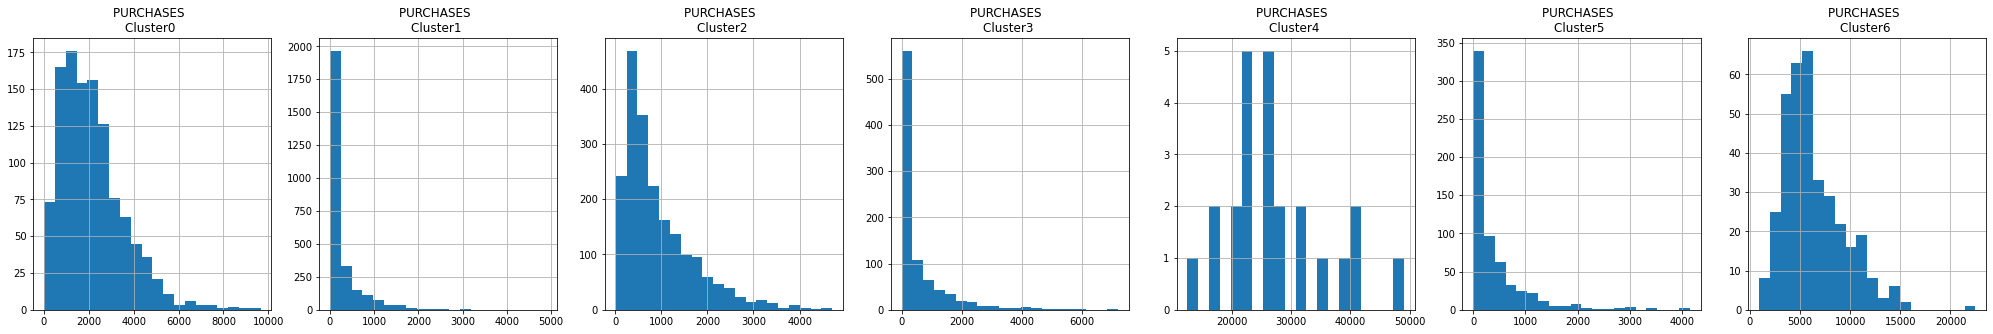

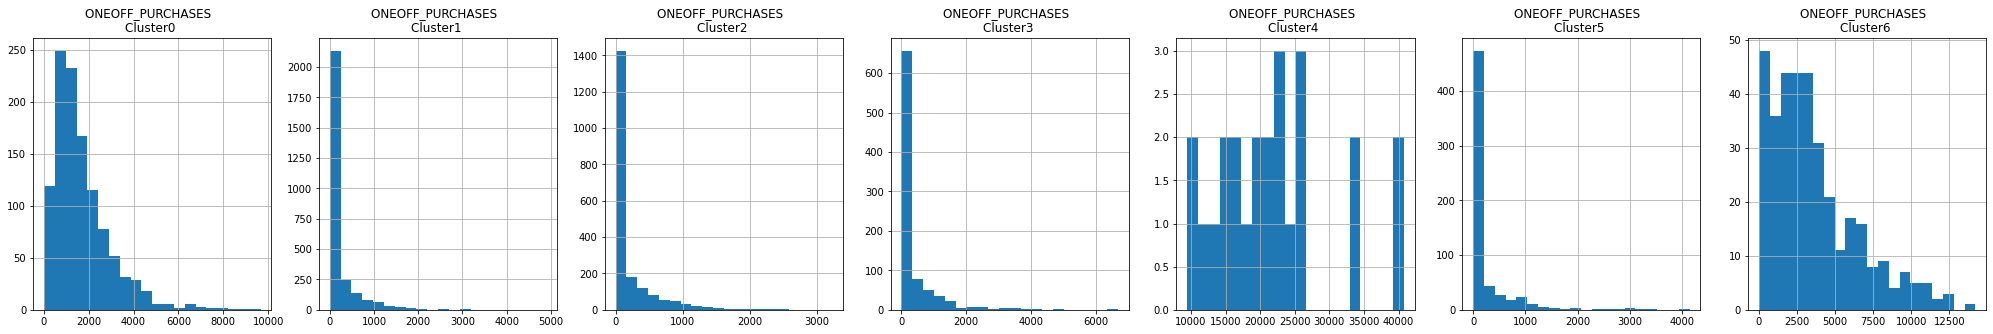

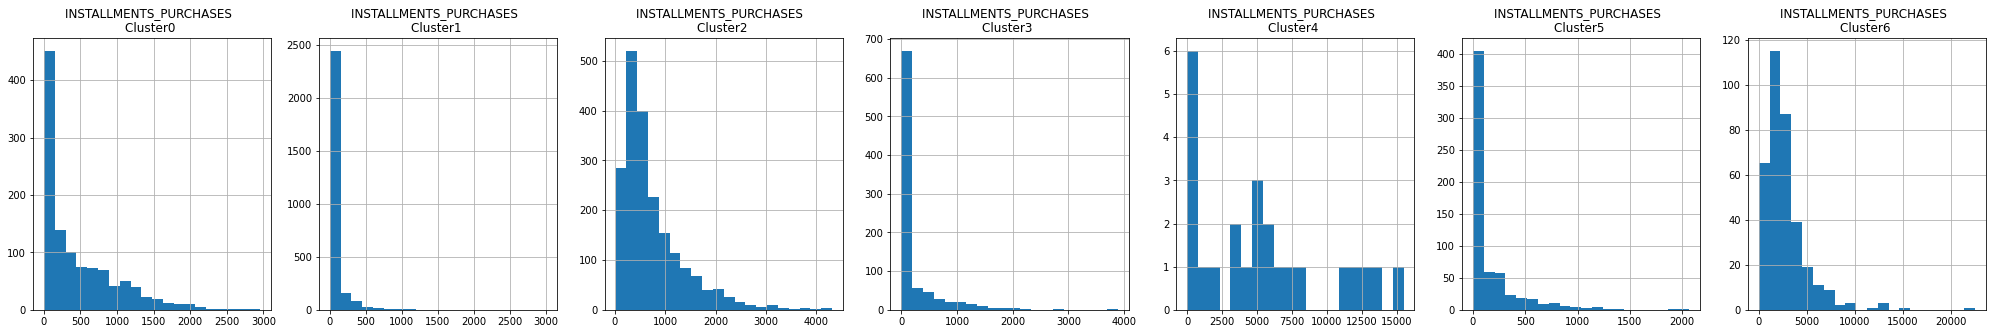

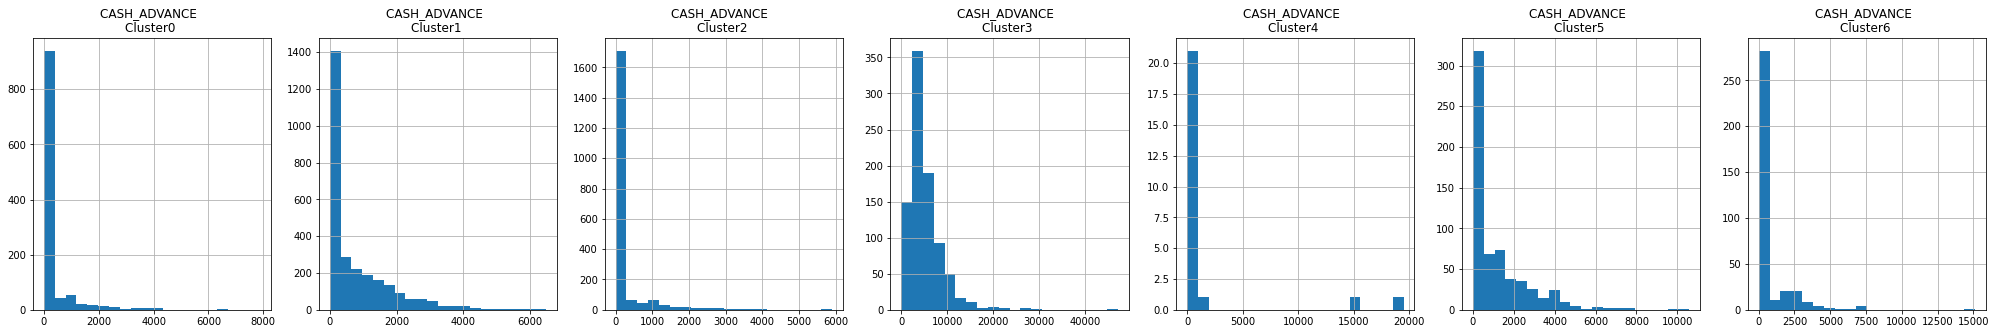

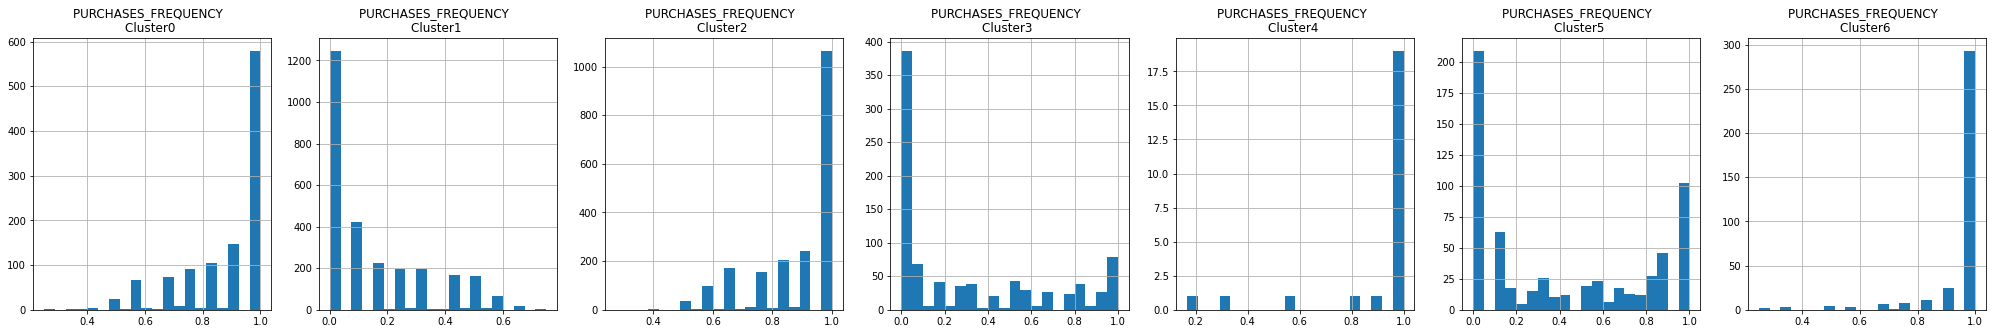

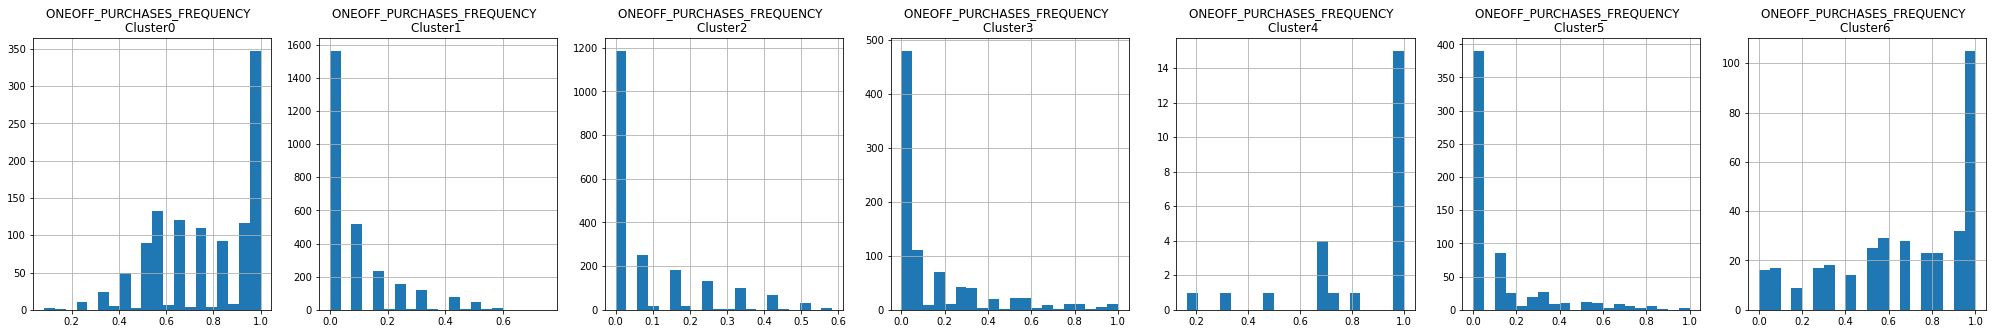

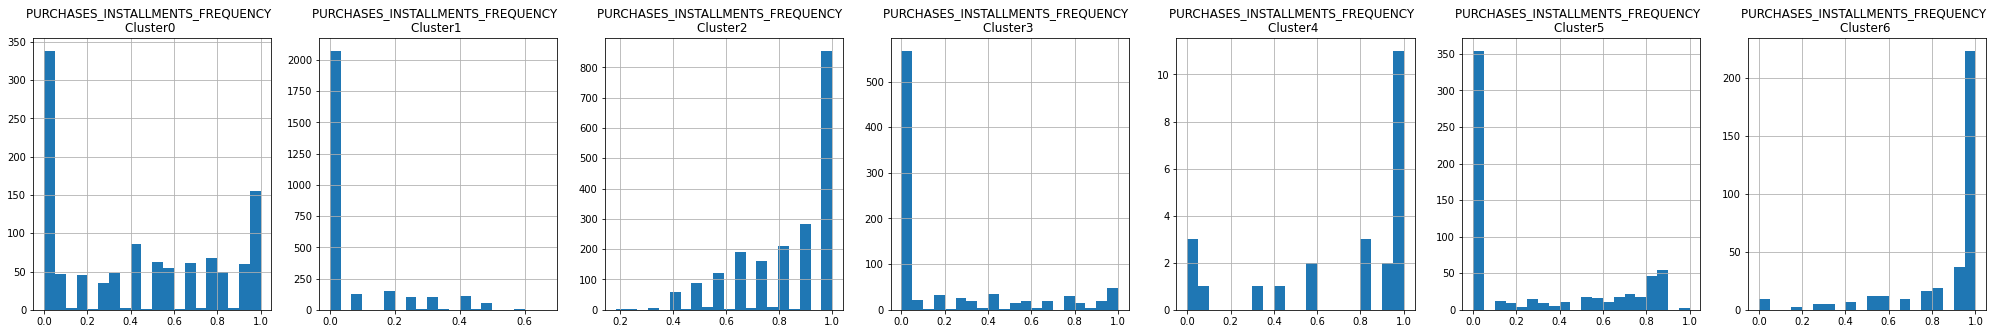

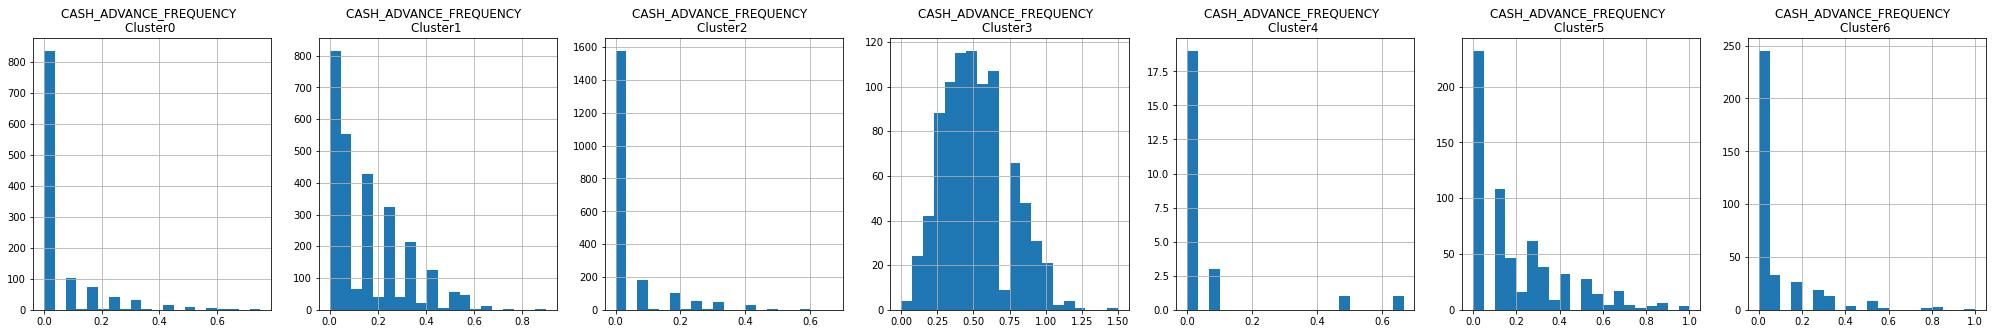

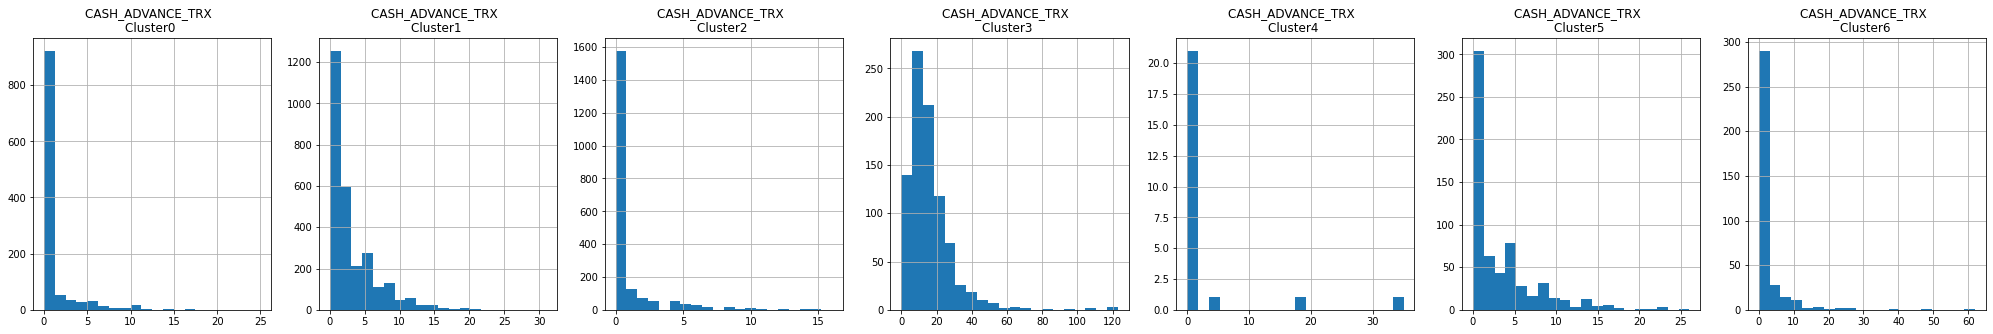

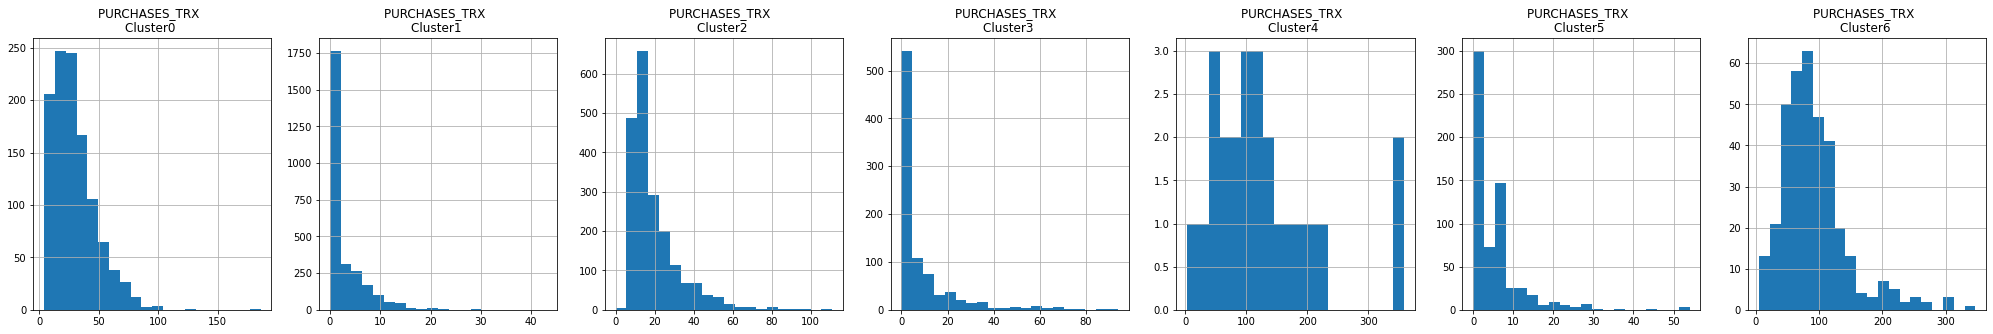

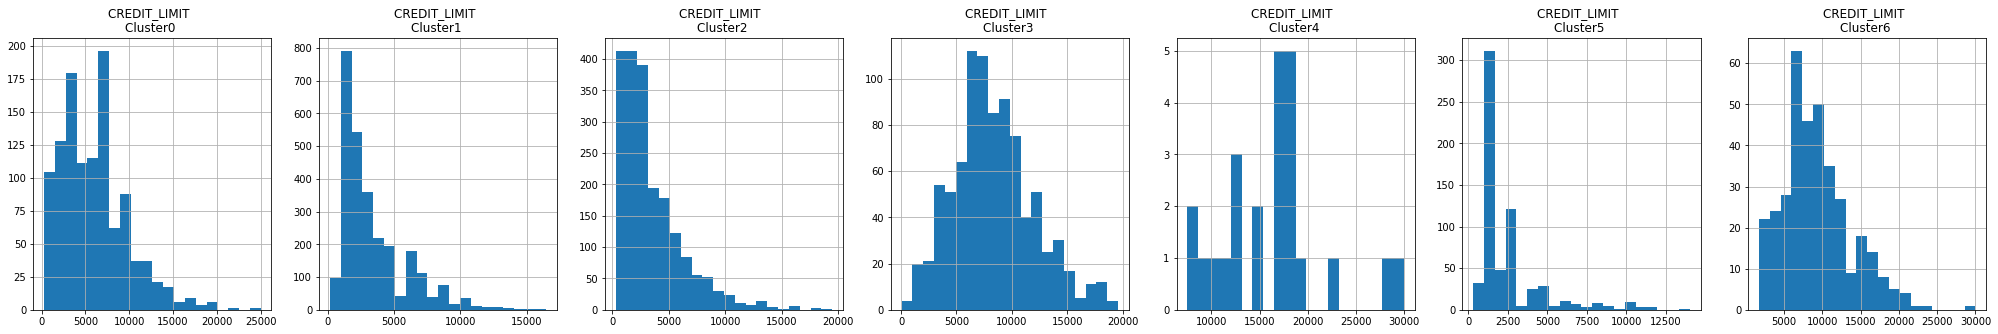

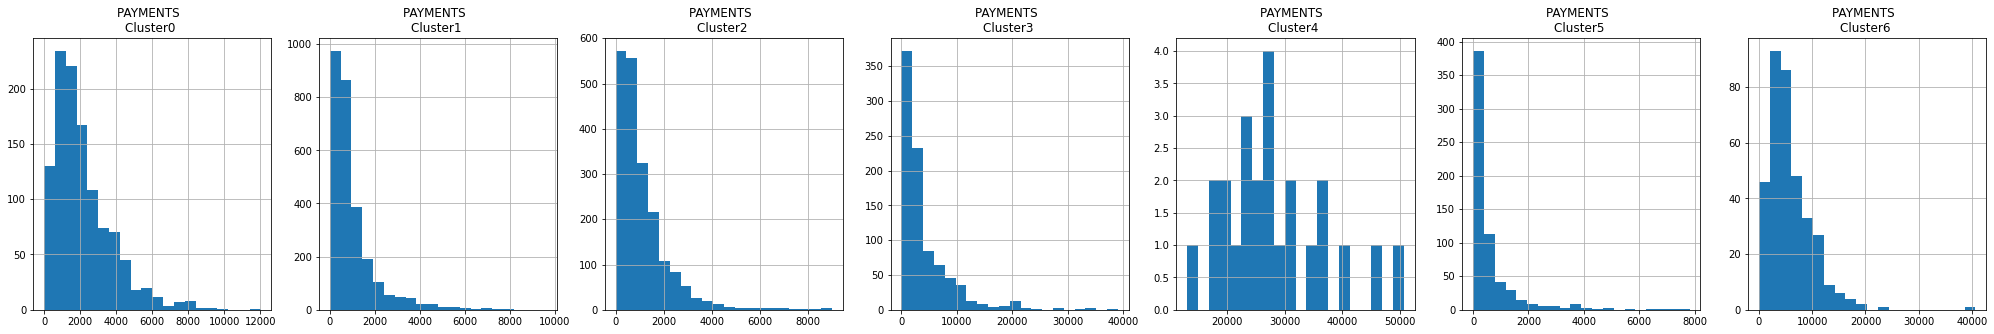

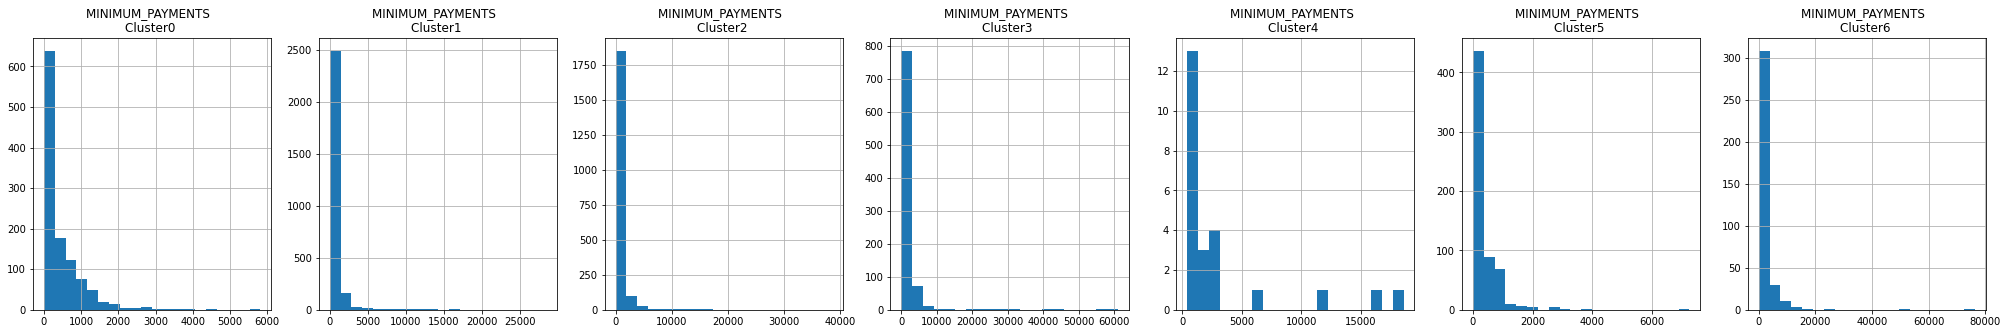

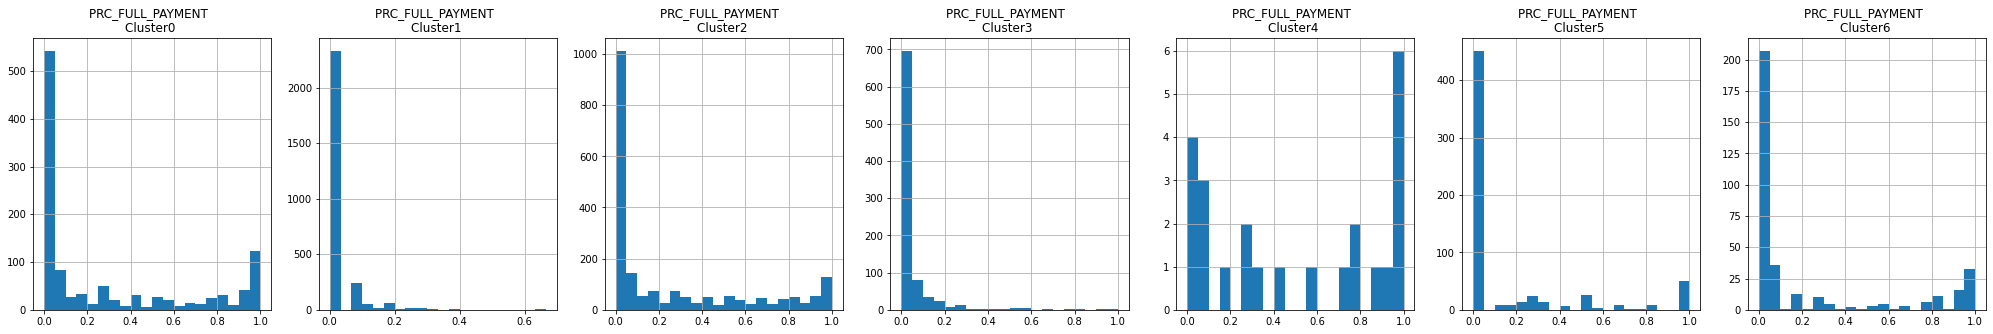

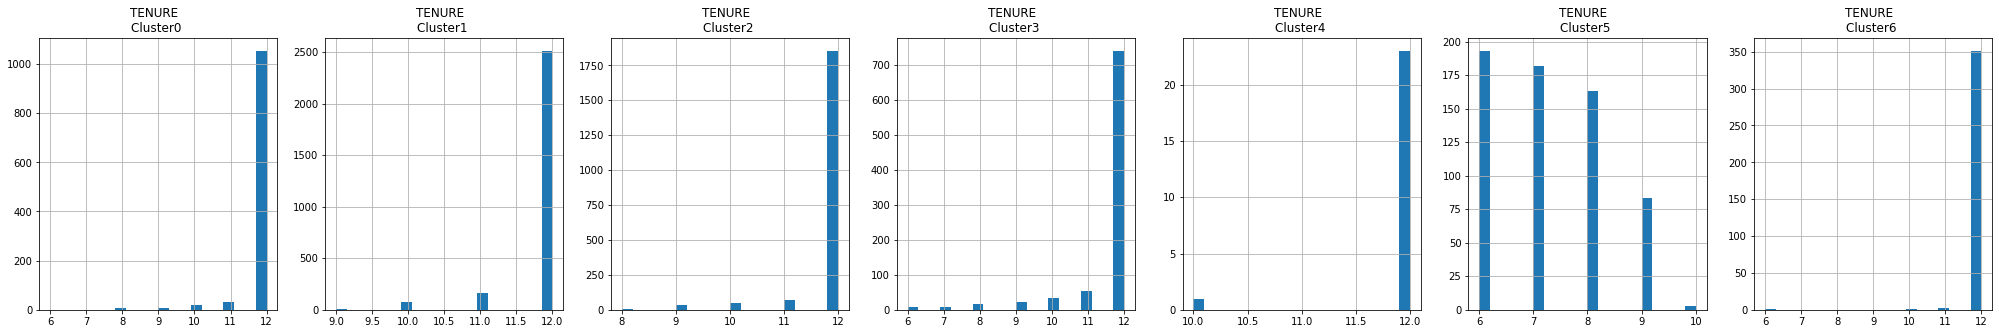

In [ ]:
#Plot the histogram of various clusters
for i in creditcard_df.columns:
  plt.figure(figsize=(35,5))
  for j in range(7):
    plt.subplot(1,7,j+1)
    cluster = creditcard_df_cluster[creditcard_df_cluster['cluster'] ==j]
    cluster[i].hist(bins = 20)
    plt.title('{}  \nCluster{} '.format(i,j))

plt.show()

Principal Component Analysis(PCA)

PCA performs dimensionality reductions while attempting at keeping the original information unchanged. PCA works by trying to find a new set of features called components. Components are composites of the uncorrelated given imput features.



In [ ]:
#Obtain the principal components
pca = PCA(n_components=2)
principal_comp =pca.fit_transform(creditcard_df_scaled)
principal_comp

array([[-1.68222006, -1.07644799],
       [-1.13829327,  2.50649936],
       [ 0.96968464, -0.38351229],
       ...,
       [-0.92620409, -1.81079211],
       [-2.33655257, -0.65797832],
       [-0.55642262, -0.40047303]])

In [ ]:
#Create DataFrame for the 2 components
pca_df = pd.DataFrame(data = principal_comp, columns =['pca1','pca2'])
pca_df.head()

,pca1,pca2
0,-1.682220,-1.076448
1,-1.138293,2.506499
2,0.969685,-0.383512
3,-0.873627,0.043170
4,-1.599434,-0.688580


In [ ]:
#Concatenate clusters labels to dataframe
#Indicates in which cluster each data point can be found 
pca_df = pd.concat([pca_df,pd.DataFrame({'cluster':labels})], axis=1)
pca_df.head()

,pca1,pca2,cluster
0,-1.682220,-1.076448,1
1,-1.138293,2.506499,3
2,0.969685,-0.383512,0
3,-0.873627,0.043170,1
4,-1.599434,-0.688580,1


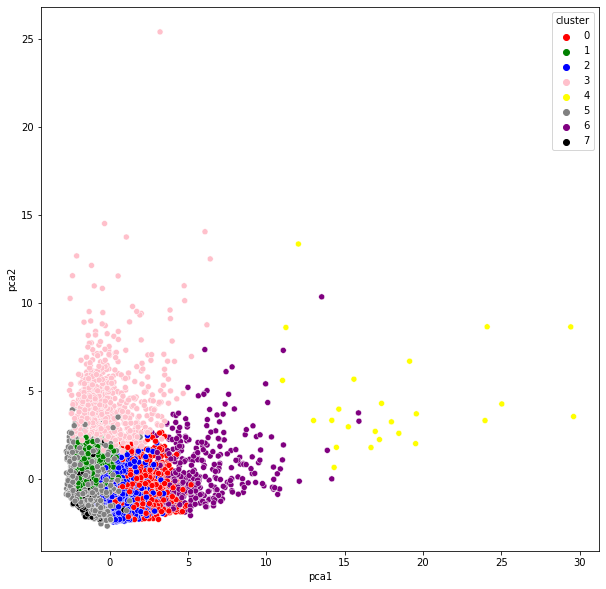

In [ ]:
plt.figure(figsize=(10,10))
ax = sns.scatterplot(x="pca1", y="pca2", hue = "cluster", data = pca_df, palette =['red','green','blue','pink','yellow','gray','purple', 'black'])
plt.show()

Dimensionality Reduction with t-SNE

t-SNE is a non-linear method that minimizes the divergence between the distributions of high-dimensional data and the low-dimensional representation it produces.

t-SNE better represents the local similarities in the data whereas PCA better represents the dissimilarities in the data. That is to say, if two points are close together in the high dimensional space, they have a high probability of being close together in the low dimensional space that t-SNE produces.

In [ ]:
mnist = mnist = fetch_openml('mnist_784', version=1, cache=True)

In [ ]:
np.random.seed(150)

indices = np.random.choice(1000,8950)
X = mnist.data[indices] / 255.0
y = mnist.target[indices]

print(X.shape, y.shape)

(8950, 784) (8950,)


In [ ]:
time_start = time.time()
tsne = TSNE(n_components=2, verbose=1, perplexity=40, n_iter=300)
tsne_results = tsne.fit_transform(X)

print('t-SNE done! Time elapsed: {} seconds'.format(time.time()-time_start))

[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Indexed 8950 samples in 1.569s...
[t-SNE] Computed neighbors for 8950 samples in 154.322s...
[t-SNE] Computed conditional probabilities for sample 1000 / 8950
[t-SNE] Computed conditional probabilities for sample 2000 / 8950
[t-SNE] Computed conditional probabilities for sample 3000 / 8950
[t-SNE] Computed conditional probabilities for sample 4000 / 8950
[t-SNE] Computed conditional probabilities for sample 5000 / 8950
[t-SNE] Computed conditional probabilities for sample 6000 / 8950
[t-SNE] Computed conditional probabilities for sample 7000 / 8950
[t-SNE] Computed conditional probabilities for sample 8000 / 8950
[t-SNE] Computed conditional probabilities for sample 8950 / 8950
[t-SNE] Mean sigma: 3.125405
[t-SNE] KL divergence after 250 iterations with early exaggeration: 73.483398
[t-SNE] KL divergence after 300 iterations: 2.138640
t-SNE done! Time elapsed: 180.4035303592682 seconds


In [ ]:
plt.figure(figsize=(10,5))
colours = ["r","b","g","c","m","y","k","r","burlywood","chartreuse"]
for i in range(tsne_results.shape[0]):
    plt.text(tsne_results[i, 0], tsne_results[i, 1], str(y[i]),
             color=colours[int(y[i])],
             fontdict={'weight': 'bold', 'size': 50}
        )

plt.xticks([])
plt.yticks([])
plt.axis('off')
plt.show()

Repeating the same procedure with 5 clusters

In [ ]:
kmeans = KMeans(5)
kmeans.fit(creditcard_df_scaled)
labels = kmeans.labels_ 

In [ ]:
#Centroid for clusters
kmeans.cluster_centers_.shape

(5, 17)

In [ ]:
#Centroids for each feature
cluster_centers = pd.DataFrame(data = kmeans.cluster_centers_, columns= [creditcard_df.columns])
cluster_centers

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,0.158653,0.431358,0.896181,0.840422,0.574939,-0.298137,1.080315,1.782363,0.556321,-0.384338,-0.306754,1.159997,0.681981,0.360735,-0.014757,0.382944,0.276932
1,-0.246779,-0.339398,-0.339031,-0.220898,-0.395667,-0.171390,-0.814682,-0.353873,-0.751613,-0.082293,-0.152860,-0.473096,-0.316575,-0.251299,-0.117704,-0.283943,-0.046351
2,1.466551,0.382502,-0.238739,-0.174952,-0.243170,1.737917,-0.522707,-0.241364,-0.458500,1.776962,1.670580,-0.295369,0.839232,0.641413,0.499242,-0.402845,-0.102454
3,1.430238,0.419467,6.915048,6.083034,5.172266,0.038778,1.090699,1.879303,1.049413,-0.249227,-0.038166,4.646228,2.198371,4.783704,1.080945,0.824001,0.334613
4,-0.441404,0.105639,-0.096115,-0.256440,0.243816,-0.381893,0.912194,-0.398972,1.080896,-0.485297,-0.372129,0.077893,-0.356091,-0.275619,-0.077427,0.403708,-0.046513


In [ ]:
# In order to understand what these numbers mean, let's perform inverse transformation
cluster_centers = scaler.inverse_transform(cluster_centers)
cluster_centers = pd.DataFrame(data = cluster_centers, columns = [creditcard_df.columns])
cluster_centers


,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,1894.697328,0.979455,2917.908886,1987.365134,930.977592,353.664281,0.923933,0.734171,0.585533,0.058234,1.155459,43.543022,6975.775324,2777.435595,829.815490,0.265719,11.887925
1,1050.825134,0.796870,278.860217,225.791285,53.271201,619.459069,0.163379,0.096890,0.065727,0.118677,2.205672,2.950434,3342.619941,1005.658947,589.902422,0.070666,11.455289
2,4616.977320,0.967882,493.136111,302.052352,191.172014,4623.363303,0.280563,0.130454,0.182218,0.490732,14.649306,7.368056,7547.920612,3589.972494,2027.669496,0.035889,11.380208
3,4541.393882,0.976638,15777.311395,10689.027791,5088.283605,1060.190695,0.928101,0.763090,0.781501,0.085271,2.988372,130.197674,12493.023256,15581.496801,3383.304083,0.394721,11.965116
4,645.729185,0.902296,797.852919,166.799462,631.547569,178.022789,0.856458,0.083437,0.794013,0.038031,0.709317,16.645963,3198.843194,935.253786,683.766560,0.271792,11.455072


Index 4: First Customer cluster (Transactors): Those are customers who pay least amount of intrerest charges and careful with their money, Cluster with lowest balance ( 645)and cashadvance( 178), Percentage of full payment = 27%

Index 2: Second Customer cluster (revolvers) who use credit card as a loan (most lucrative sector): highest balance ( 4616)and cashadvance(  4623), low purchase frequency, high cash advance frequency (0.49), high cash advance transactions (14) and low percentage of full payment (3%)

Index 3: Third Customer cluster(VIP/Prime): high credit limit $12.5K and highest percentage of full payment, target for increase credit limit and increase spending habits

All clusters indicate tenure 11

In [ ]:
labels.shape

(8950,)

In [ ]:
labels.min()

0

In [ ]:
labels.max()

4

In [ ]:
y_kmeans = kmeans.fit_predict(creditcard_df_scaled)
y_kmeans

array([4, 3, 2, ..., 0, 4, 4], dtype=int32)

In [ ]:
#Concatenate clusters labels to original dataframe.
creditcard_df_cluster = pd.concat([creditcard_df,pd.DataFrame({'cluster':labels})], axis=1)
creditcard_df_cluster.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,cluster
0,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12,1
1,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12,2
2,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12,0
3,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,864.206542,0.000000,12,1
4,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12,1


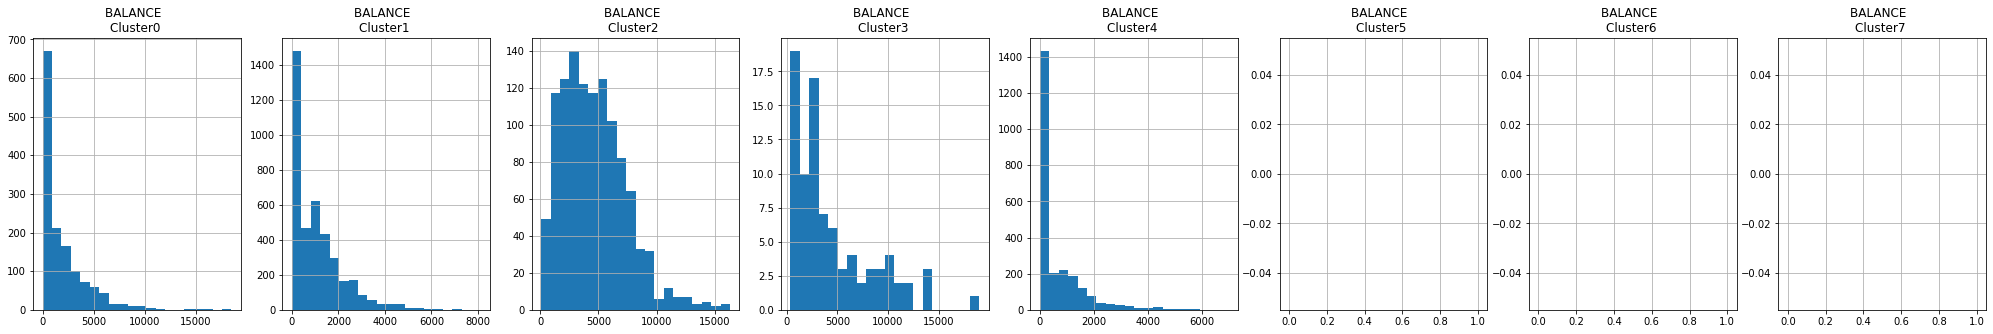

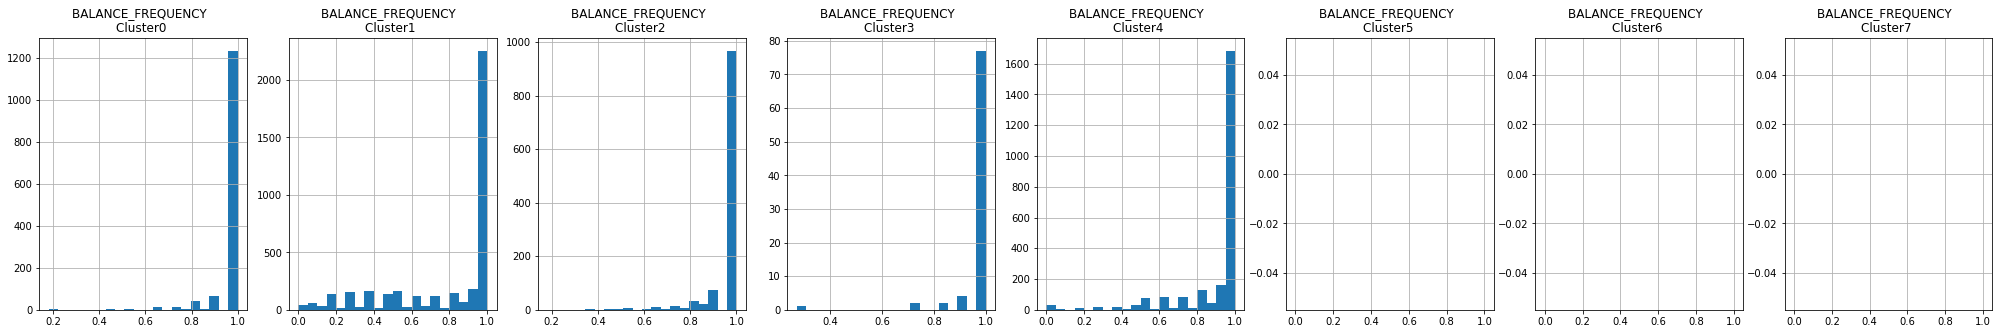

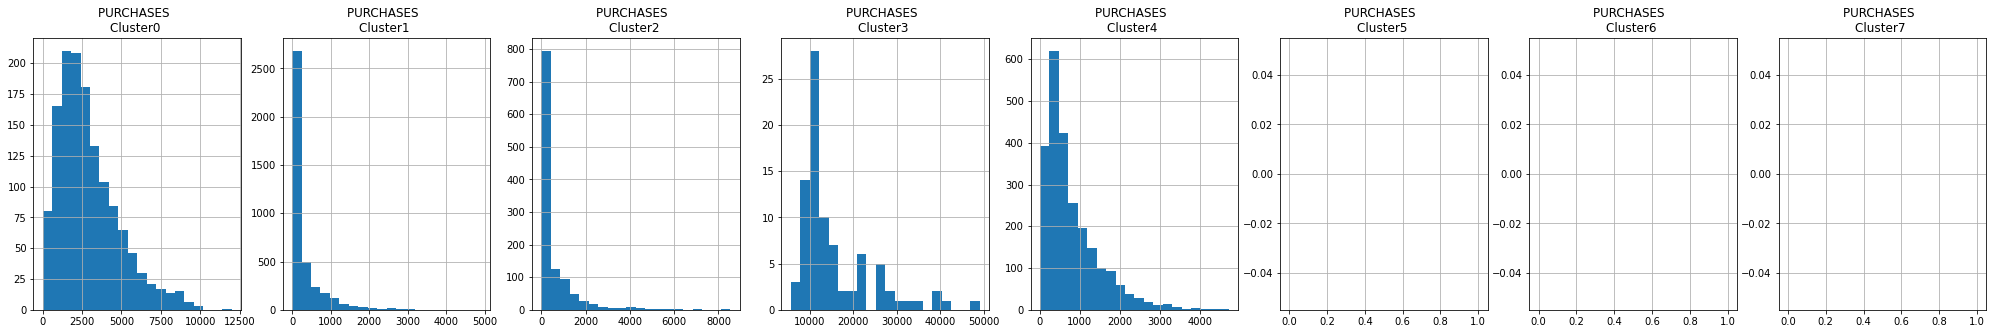

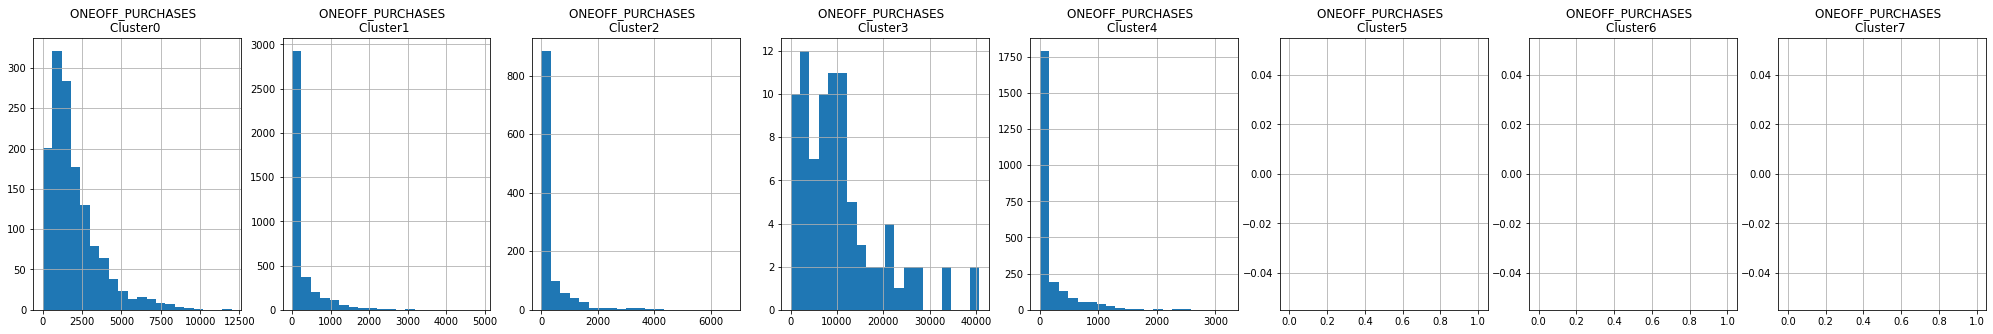

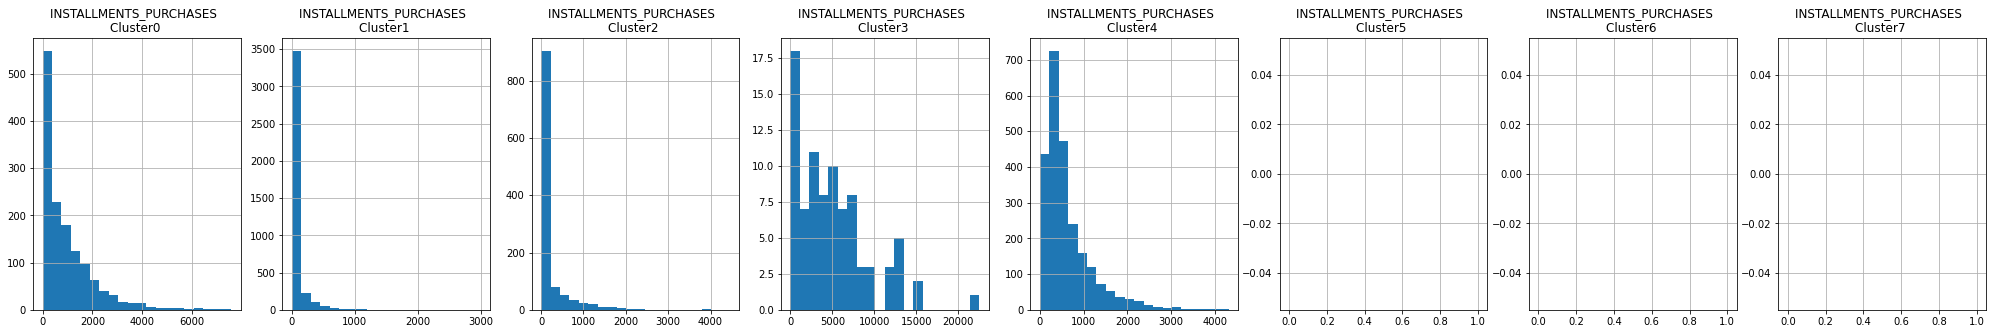

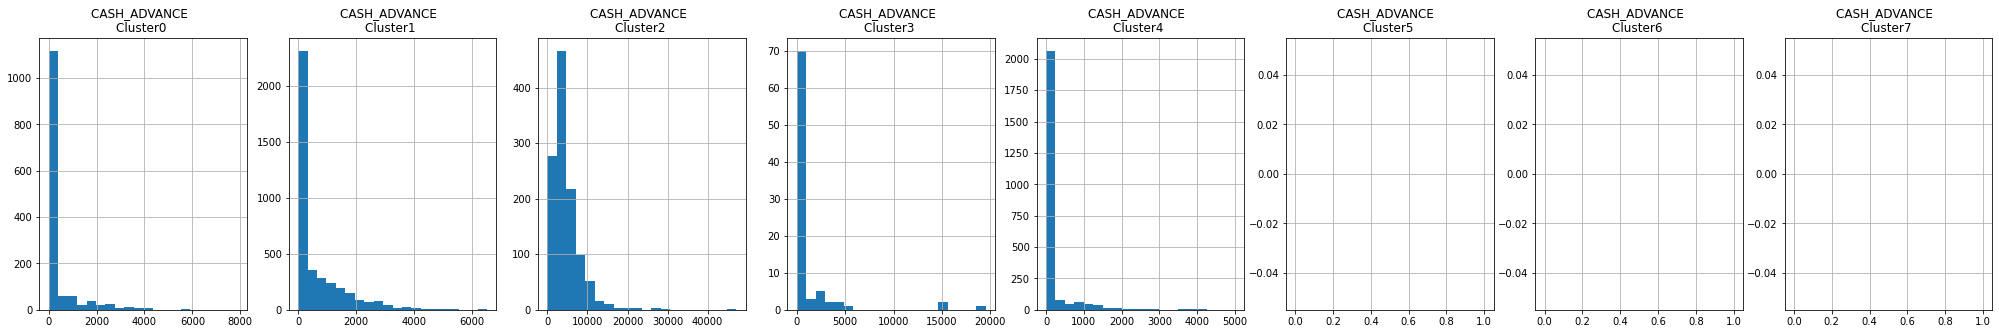

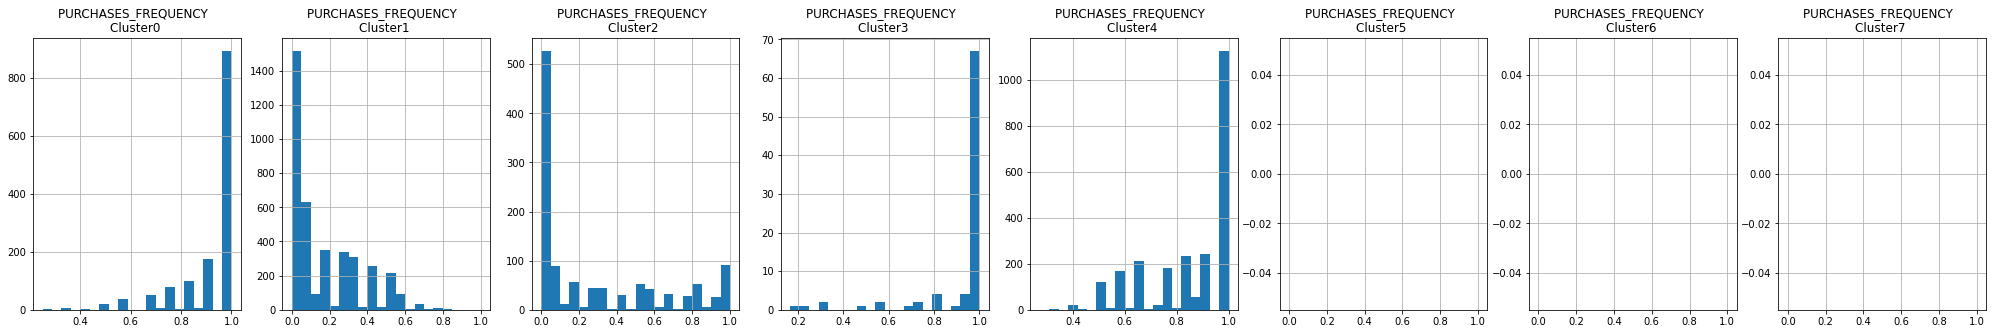

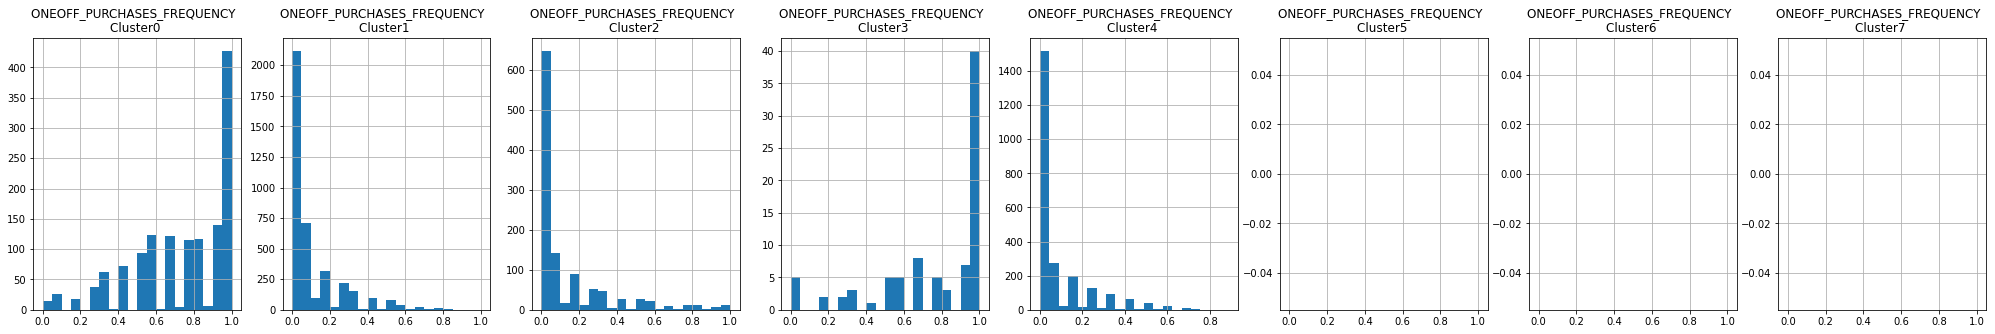

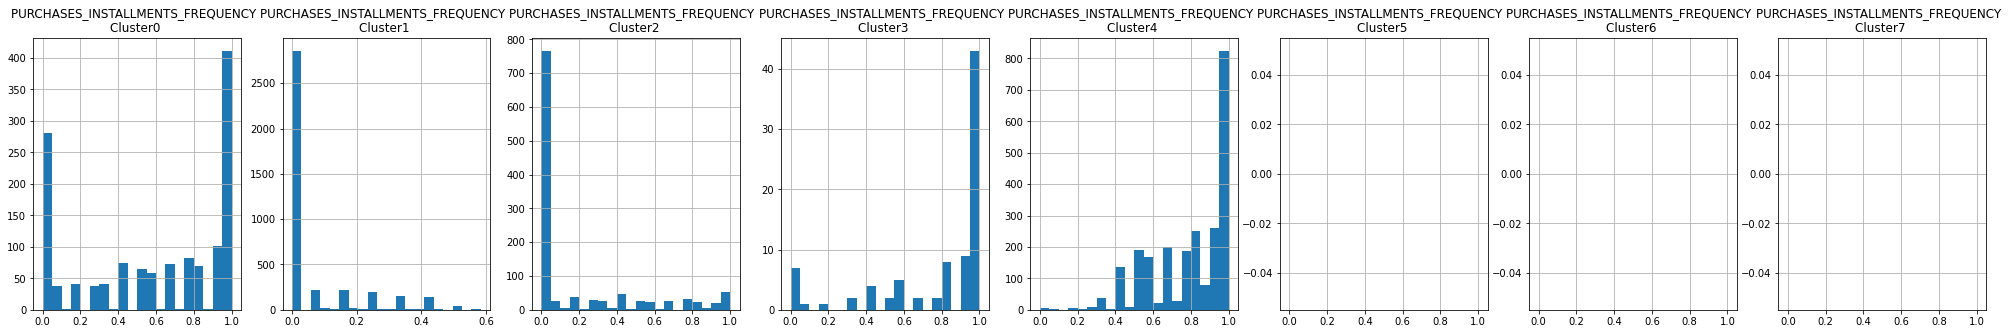

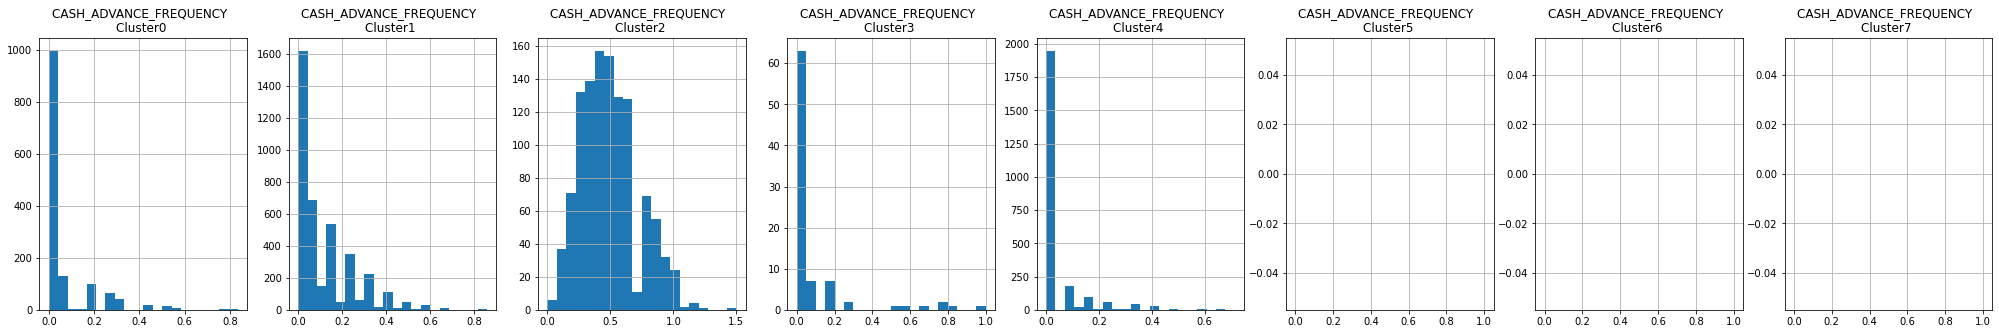

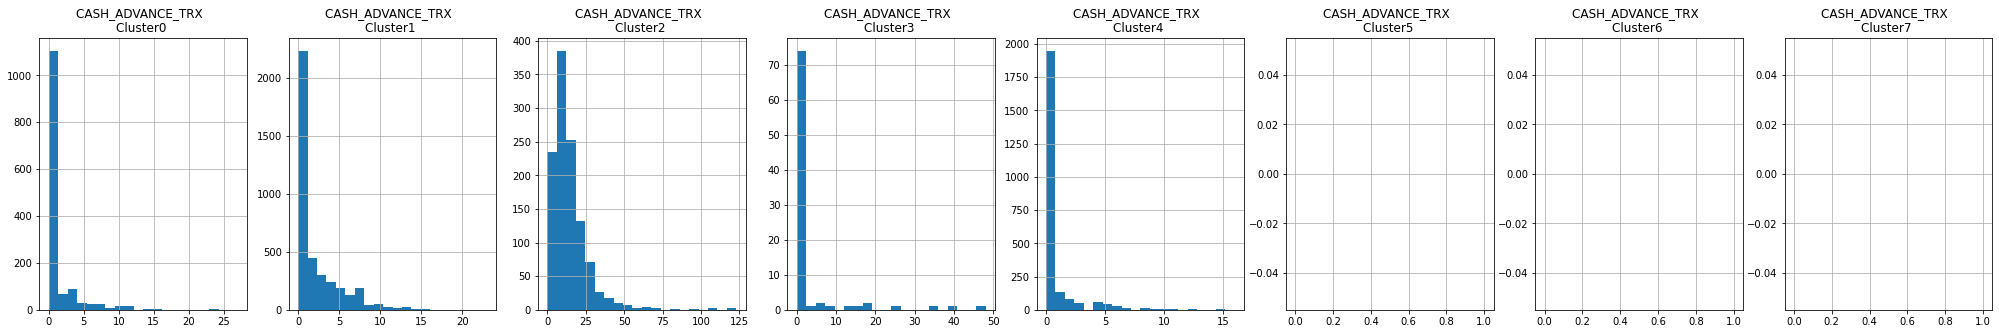

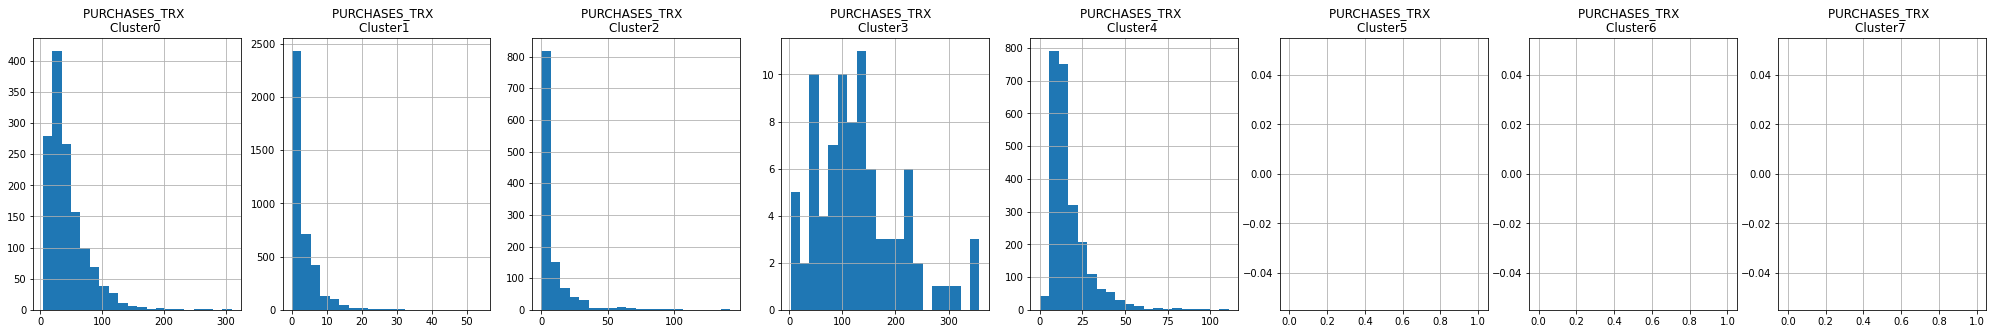

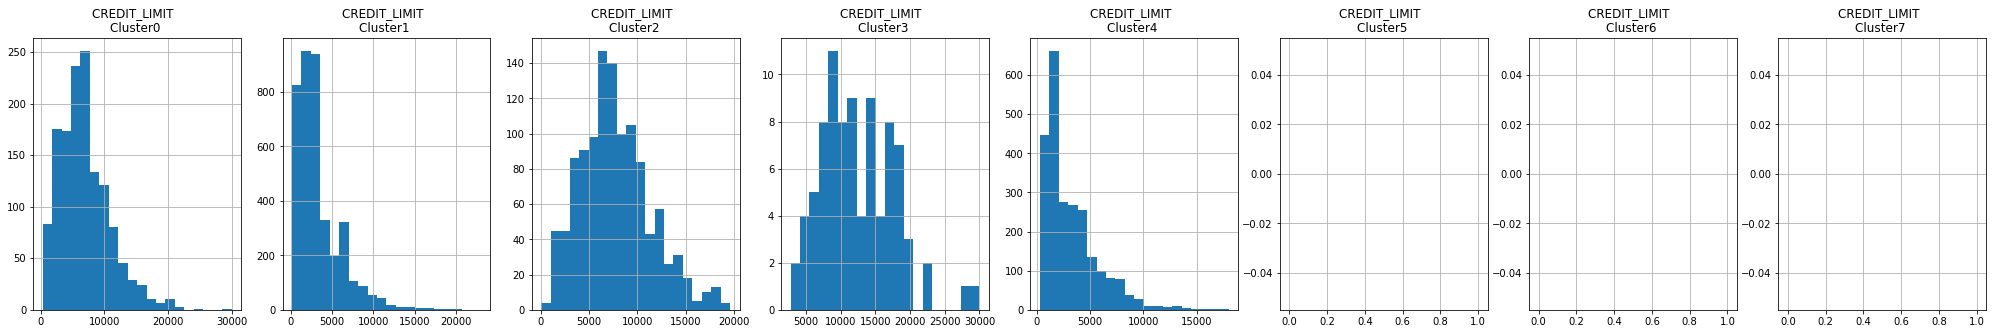

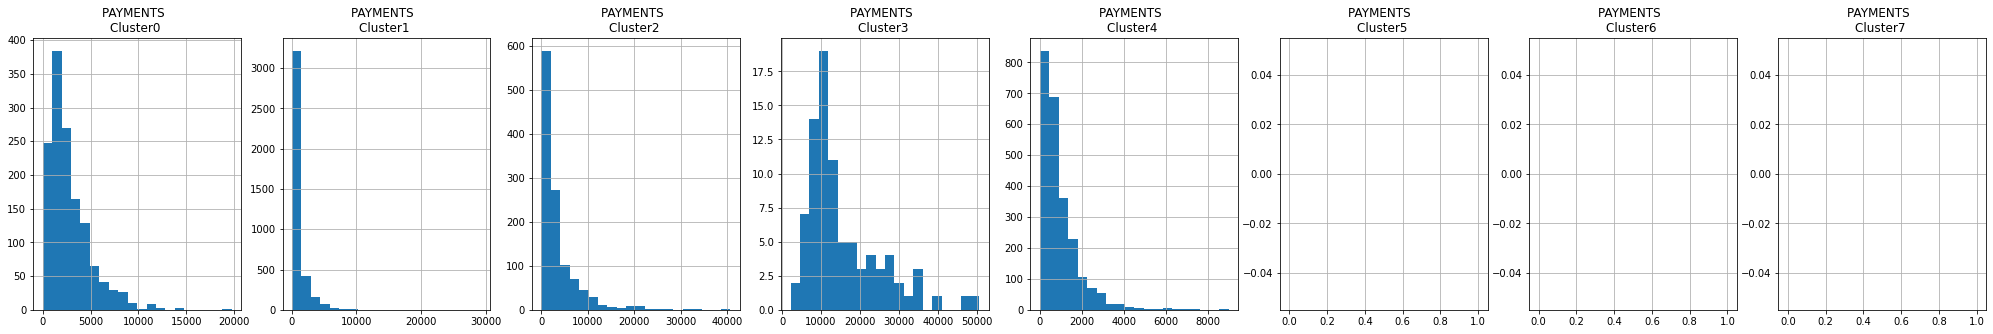

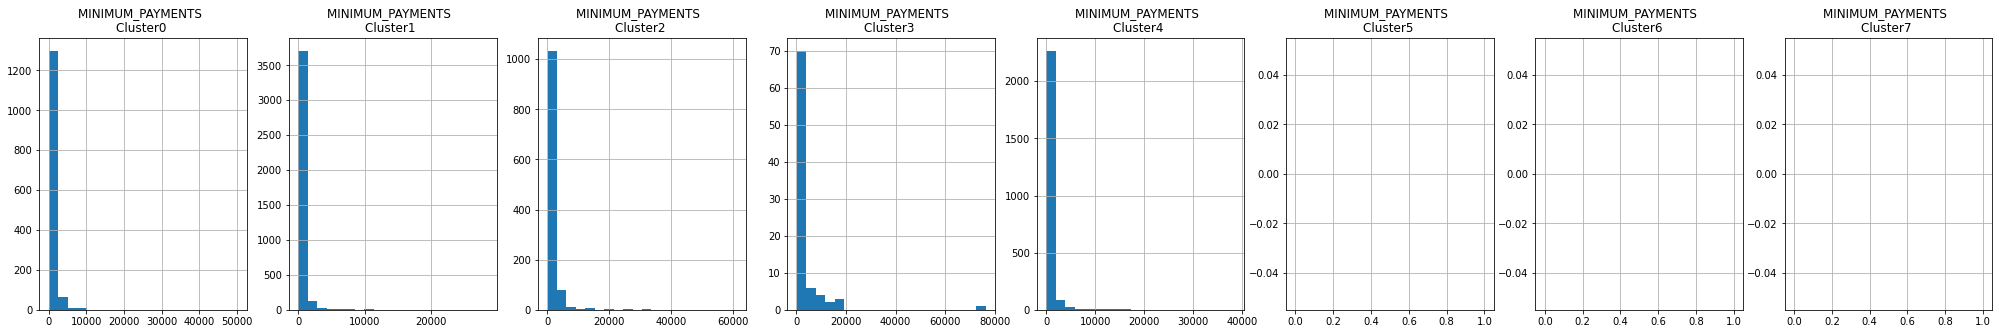

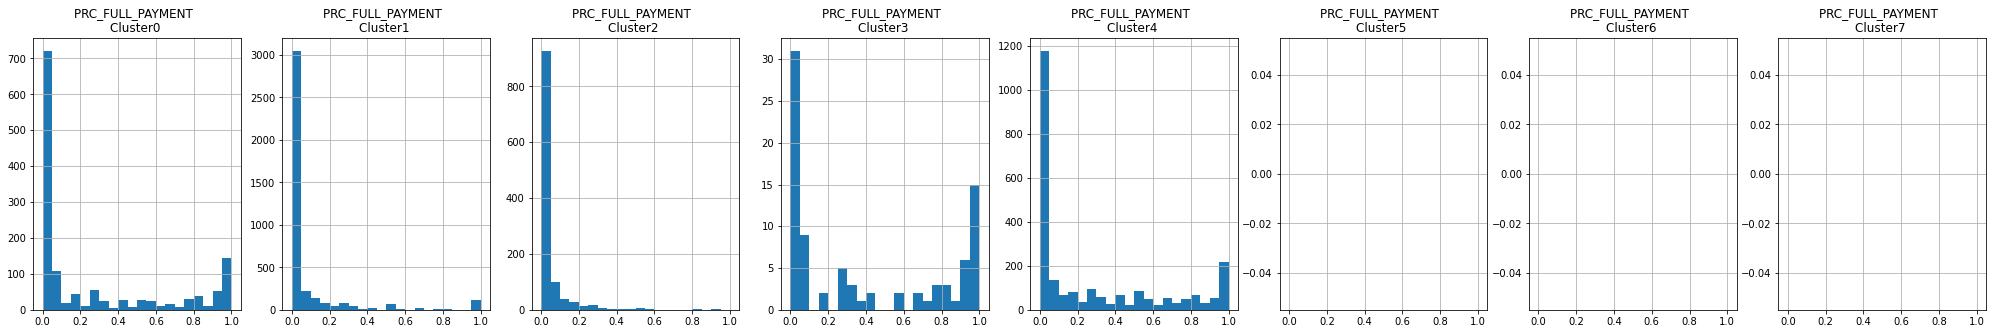

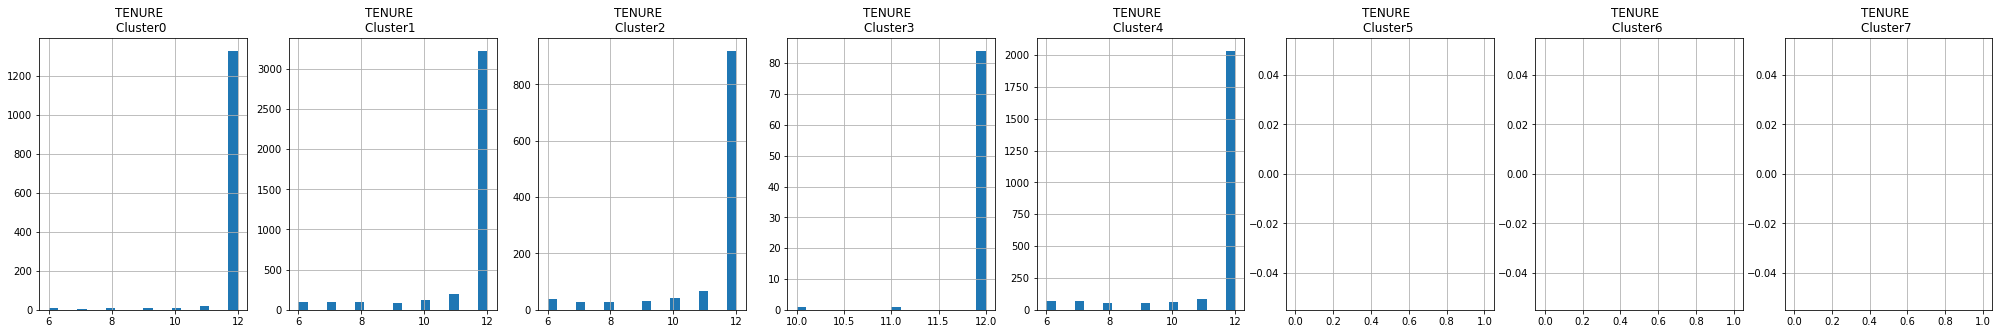

In [ ]:
#Plot the histogram of various clusters
for i in creditcard_df.columns:
  plt.figure(figsize=(35,5))
  for j in range(8):
    plt.subplot(1,8,j+1)
    cluster = creditcard_df_cluster[creditcard_df_cluster['cluster'] ==j]
    cluster[i].hist(bins = 20)
    plt.title('{}  \nCluster{} '.format(i,j))

plt.show()

In [ ]:
#Obtain the principal components
pca = PCA(n_components=2)
principal_comp =pca.fit_transform(creditcard_df_scaled)
principal_comp

array([[-1.68222065, -1.0764502 ],
       [-1.13829441,  2.5064714 ],
       [ 0.96968955, -0.3835436 ],
       ...,
       [-0.9262052 , -1.81077904],
       [-2.33655381, -0.65795612],
       [-0.55642075, -0.40047008]])

In [ ]:
#Create DataFrame for the 2 components
pca_df = pd.DataFrame(data = principal_comp, columns =['pca1','pca2'])
pca_df.head()

,pca1,pca2
0,-1.682221,-1.076450
1,-1.138294,2.506471
2,0.969690,-0.383544
3,-0.873630,0.043172
4,-1.599433,-0.688583


In [ ]:
#Concatenate clusters labels to dataframe
pca_df = pd.concat([pca_df,pd.DataFrame({'cluster':labels})], axis=1)
pca_df.head()

,pca1,pca2,cluster
0,-1.682221,-1.076450,1
1,-1.138294,2.506471,2
2,0.969690,-0.383544,0
3,-0.873630,0.043172,1
4,-1.599433,-0.688583,1


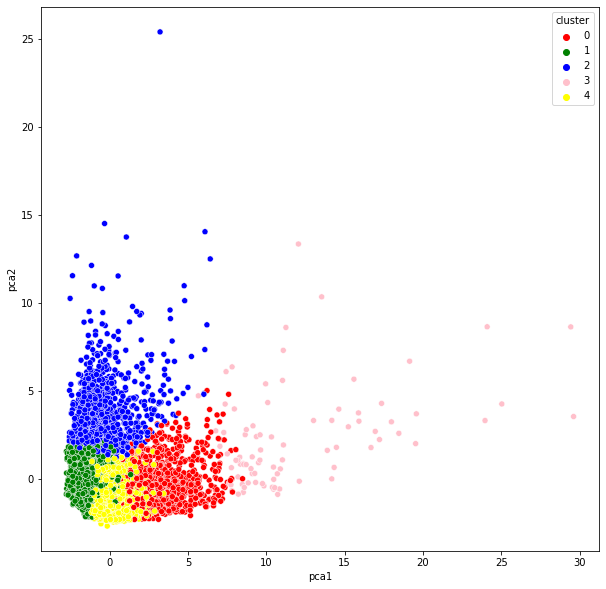

In [ ]:
plt.figure(figsize=(10,10))
ax = sns.scatterplot(x="pca1", y="pca2",  hue = "cluster", data = pca_df, palette =['red','green','blue','pink','yellow'])
plt.show()

In [ ]:
#Dimensionality reduction with t-SNE
np.random.seed(150)

indices = np.random.choice(1000,8950)
X = mnist.data[indices] / 255.0
y = mnist.target[indices]

print(X.shape, y.shape)

(8950, 784) (8950,)


In [ ]:
time_start = time.time()
tsne = TSNE(n_components=2, verbose=1, perplexity=40, n_iter=300)
tsne_results = tsne.fit_transform(X)

print('t-SNE done! Time elapsed: {} seconds'.format(time.time()-time_start))

[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Indexed 8950 samples in 0.988s...
[t-SNE] Computed neighbors for 8950 samples in 151.264s...
[t-SNE] Computed conditional probabilities for sample 1000 / 8950
[t-SNE] Computed conditional probabilities for sample 2000 / 8950
[t-SNE] Computed conditional probabilities for sample 3000 / 8950
[t-SNE] Computed conditional probabilities for sample 4000 / 8950
[t-SNE] Computed conditional probabilities for sample 5000 / 8950
[t-SNE] Computed conditional probabilities for sample 6000 / 8950
[t-SNE] Computed conditional probabilities for sample 7000 / 8950
[t-SNE] Computed conditional probabilities for sample 8000 / 8950
[t-SNE] Computed conditional probabilities for sample 8950 / 8950
[t-SNE] Mean sigma: 3.125405
[t-SNE] KL divergence after 250 iterations with early exaggeration: 73.483398
[t-SNE] KL divergence after 300 iterations: 2.138640
t-SNE done! Time elapsed: 176.29211592674255 seconds


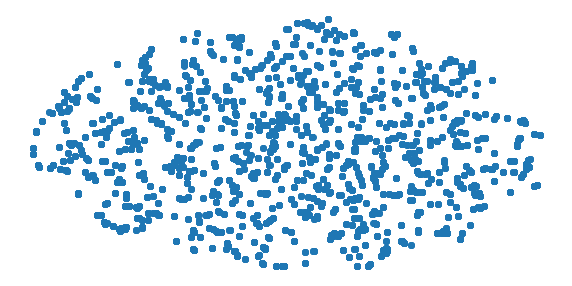

In [ ]:
plt.figure(figsize=(10,5))
plt.scatter(tsne_results[:, 0], tsne_results[:, 1])
plt.xticks([])
plt.yticks([])
plt.axis('off')
plt.show()